# Contextualización del Dataset de Detección de Fraude en Tarjetas de Crédito

Este documento proporciona una descripción detallada y académica del conjunto de datos utilizado para la detección de transacciones fraudulentas en tarjetas de crédito, destacando su relevancia en el ámbito de la seguridad financiera y el análisis de grandes volúmenes de datos.

## 1. Contexto y Relevancia

El fraude en transacciones con tarjetas de crédito representa un reto significativo para las instituciones financieras, ya que puede ocasionar perjuicios económicos tanto a los consumidores como a las empresas. La capacidad para detectar y prevenir estas actividades fraudulentas es esencial para minimizar riesgos y garantizar la confianza en los servicios bancarios. Este conjunto de datos se centra en transacciones realizadas en septiembre de 2013 por usuarios europeos, permitiendo el estudio y la aplicación de diversas técnicas de aprendizaje automático para identificar comportamientos anómalos.

## 2. Descripción del Conjunto de Datos

El dataset está compuesto por 284,807 transacciones, de las cuales únicamente 492 han sido identificadas como fraudulentas. Esto se traduce en una marcada desbalance en las clases, donde el 0.172% de las transacciones corresponden a fraudes. Entre las características principales se destacan:

- **Transformación PCA:**  
  Las variables originales han sido transformadas mediante Análisis de Componentes Principales (PCA), generando 28 características (V1, V2, …, V28) que capturan la mayor parte de la varianza presente en los datos.

- **Características No Transformadas:**  
  - **Time:** Representa el tiempo transcurrido en segundos desde la primera transacción registrada.
  - **Amount:** Indica el monto de la transacción, pudiendo ser utilizado en estrategias de aprendizaje coste-dependiente.

- **Variable Objetivo:**  
  - **Class:** Variable binaria donde `1` indica una transacción fraudulenta y `0` una transacción legítima.

Debido a restricciones de confidencialidad, no se han revelado las variables originales, lo que impone un desafío adicional al interpretar los patrones subyacentes y aplicar técnicas de detección de anomalías.

## 3. Metodología y Consideraciones para la Evaluación

Debido al desbalance de clases, las métricas tradicionales basadas en la matriz de confusión pueden resultar engañosas. Por ello, se recomienda el uso de la **Área Bajo la Curva de Precisión-Recall (AUPRC)** para evaluar la eficacia de los modelos de clasificación. Esta medida proporciona una visión más precisa del rendimiento en situaciones donde la clase minoritaria (fraude) es de especial interés.

## 4. Actualizaciones y Recursos Adicionales

El 03/05/2021 se publicó un simulador de datos transaccionales, accesible en el [Fraud Detection Handbook](https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html). Este recurso complementario es altamente recomendable para aquellos investigadores y profesionales interesados en experimentar con metodologías avanzadas de detección de fraude en entornos simulados.

## 5. Agradecimientos y Referencias Académicas

El desarrollo y análisis de este dataset se han llevado a cabo en colaboración entre Worldline y el Grupo de Machine Learning (MLG) de la ULB (Université Libre de Bruxelles). Se reconoce también el aporte de múltiples proyectos e investigaciones en el área de detección de fraude, entre las cuales se destacan las siguientes publicaciones:

- Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson y Gianluca Bontempi. *Calibrating Probability with Undersampling for Unbalanced Classification*. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015.
- Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. *Learned lessons in credit card fraud detection from a practitioner perspective*, Expert Systems with Applications, 41(10), 4915-4928, 2014.
- Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. *Credit card fraud detection: a realistic modeling and a novel learning strategy*, IEEE Transactions on Neural Networks and Learning Systems, 29(8), 3784-3797, 2018.
- Andrea Dal Pozzolo. *Adaptive Machine Learning for Credit Card Fraud Detection*, Tesis Doctoral, ULB MLG.
- Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. *Scarff: a scalable framework for streaming credit card fraud detection with Spark*, Information Fusion, 41, 182-194, 2018.
- Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. *Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization*, International Journal of Data Science and Analytics, 5(4), 285-300, 2018.
- Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi. *Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection*, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp. 78-88, 2019.
- Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi. *Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection*, Information Sciences, 2019.
- Yann-Aël Le Borgne, Gianluca Bontempi. *Reproducible Machine Learning for Credit Card Fraud Detection - Practical Handbook*.
- Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi. *Incremental Learning Strategies for Credit Cards Fraud Detection*, International Journal of Data Science and Analytics.

Este conjunto de referencias proporciona un panorama amplio y sólido sobre las estrategias, metodologías y lecciones aprendidas en la detección de fraude, consolidando la base teórica y práctica necesaria para avanzar en este campo de estudio.

---

*El presente documento se ha preparado con el objetivo de servir como una guía académica y profesional para el análisis y desarrollo de modelos de detección de fraude en tarjetas de crédito, facilitando la comprensión de los retos y las metodologías aplicables en entornos de datos altamente desbalanceados.*


# Exploracion y preparacion del dataset

Librerias necesarias.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rich.console import Console
from rich.table import Table
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import mstats
from rich.progress import Progress
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, recall_score,
                             precision_recall_curve, average_precision_score,
                             classification_report, confusion_matrix)


Importacion de datos 

In [4]:
df = pd.read_csv(r"data\raw\creditcard.csv")  # Para archivos CSV estándar

Una vez importado comenzamos con la limpieza principal que seria la elimnacion de los inf nan y filas vacias esto lo haremos para verificar que no haya datos que hagan que nuestro analaisis sea erroneo

In [5]:
def clean_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    console = Console()
    
    # Resumen inicial
    original_filas, original_columnas = df.shape
    tipos_iniciales = df.dtypes.value_counts()
    missing_inicial = df.isna().sum().sum()
    
    # Reemplazar inf y -inf por NaN y eliminar datos faltantes
    df_clean = df.replace([np.inf, -np.inf], np.nan)
    df_clean = df_clean.dropna()
    filas_limpias, columnas_limpias = df_clean.shape
    tipos_finales = df_clean.dtypes.value_counts()
    
    # Crear tabla resumen de limpieza
    resumen = Table(title="Resumen de limpieza del DataFrame")
    resumen.add_column("Aspecto", style="cyan", no_wrap=True)
    resumen.add_column("Antes", style="magenta")
    resumen.add_column("Después", style="green")
    
    resumen.add_row("Filas", str(original_filas), str(filas_limpias))
    resumen.add_row("Columnas", str(original_columnas), str(columnas_limpias))
    resumen.add_row("Total de datos faltantes", str(missing_inicial), "0")
    
    # Tabla de composición de columnas antes de la limpieza
    comp_before = Table(title="Composición de columnas (Antes)")
    comp_before.add_column("Tipo", style="cyan")
    comp_before.add_column("Cantidad", style="magenta")
    for tipo, cantidad in tipos_iniciales.items():
        comp_before.add_row(str(tipo), str(cantidad))
    
    # Tabla de composición de columnas después de la limpieza
    comp_after = Table(title="Composición de columnas (Después)")
    comp_after.add_column("Tipo", style="cyan")
    comp_after.add_column("Cantidad", style="green")
    for tipo, cantidad in tipos_finales.items():
        comp_after.add_row(str(tipo), str(cantidad))
    
    # Mostrar tablas en consola
    console.print(resumen)
    console.print(comp_before)
    console.print(comp_after)
    
    return df_clean

df_limpio = clean_dataframe(df)

       Resumen de limpieza del DataFrame       
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Aspecto                  ┃ Antes  ┃ Después ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ Filas                    │ 284807 │ 284807  │
│ Columnas                 │ 31     │ 31      │
│ Total de datos faltantes │ 0      │ 0       │
└──────────────────────────┴────────┴─────────┘

    Composición de    
   columnas (Antes)   
┏━━━━━━━━━┳━━━━━━━━━━┓
┃ Tipo    ┃ Cantidad ┃
┡━━━━━━━━━╇━━━━━━━━━━┩
│ float64 │ 30       │
│ int64   │ 1        │
└─────────┴──────────┘

    Composición de    
  columnas (Después)  
┏━━━━━━━━━┳━━━━━━━━━━┓
┃ Tipo    ┃ Cantidad ┃
┡━━━━━━━━━╇━━━━━━━━━━┩
│ float64 │ 30       │
│ int64   │ 1        │
└─────────┴──────────┘

No hay nan ni inf ni ninguna clse de dato que afecte los outliners

Ahora revicemos si los datos tienen outliners o estan bien destribuidos, para ello utilizaresmos un histograma de cada columna de nuestro dataframe para identificar que nuestras distribuciones esten bien.

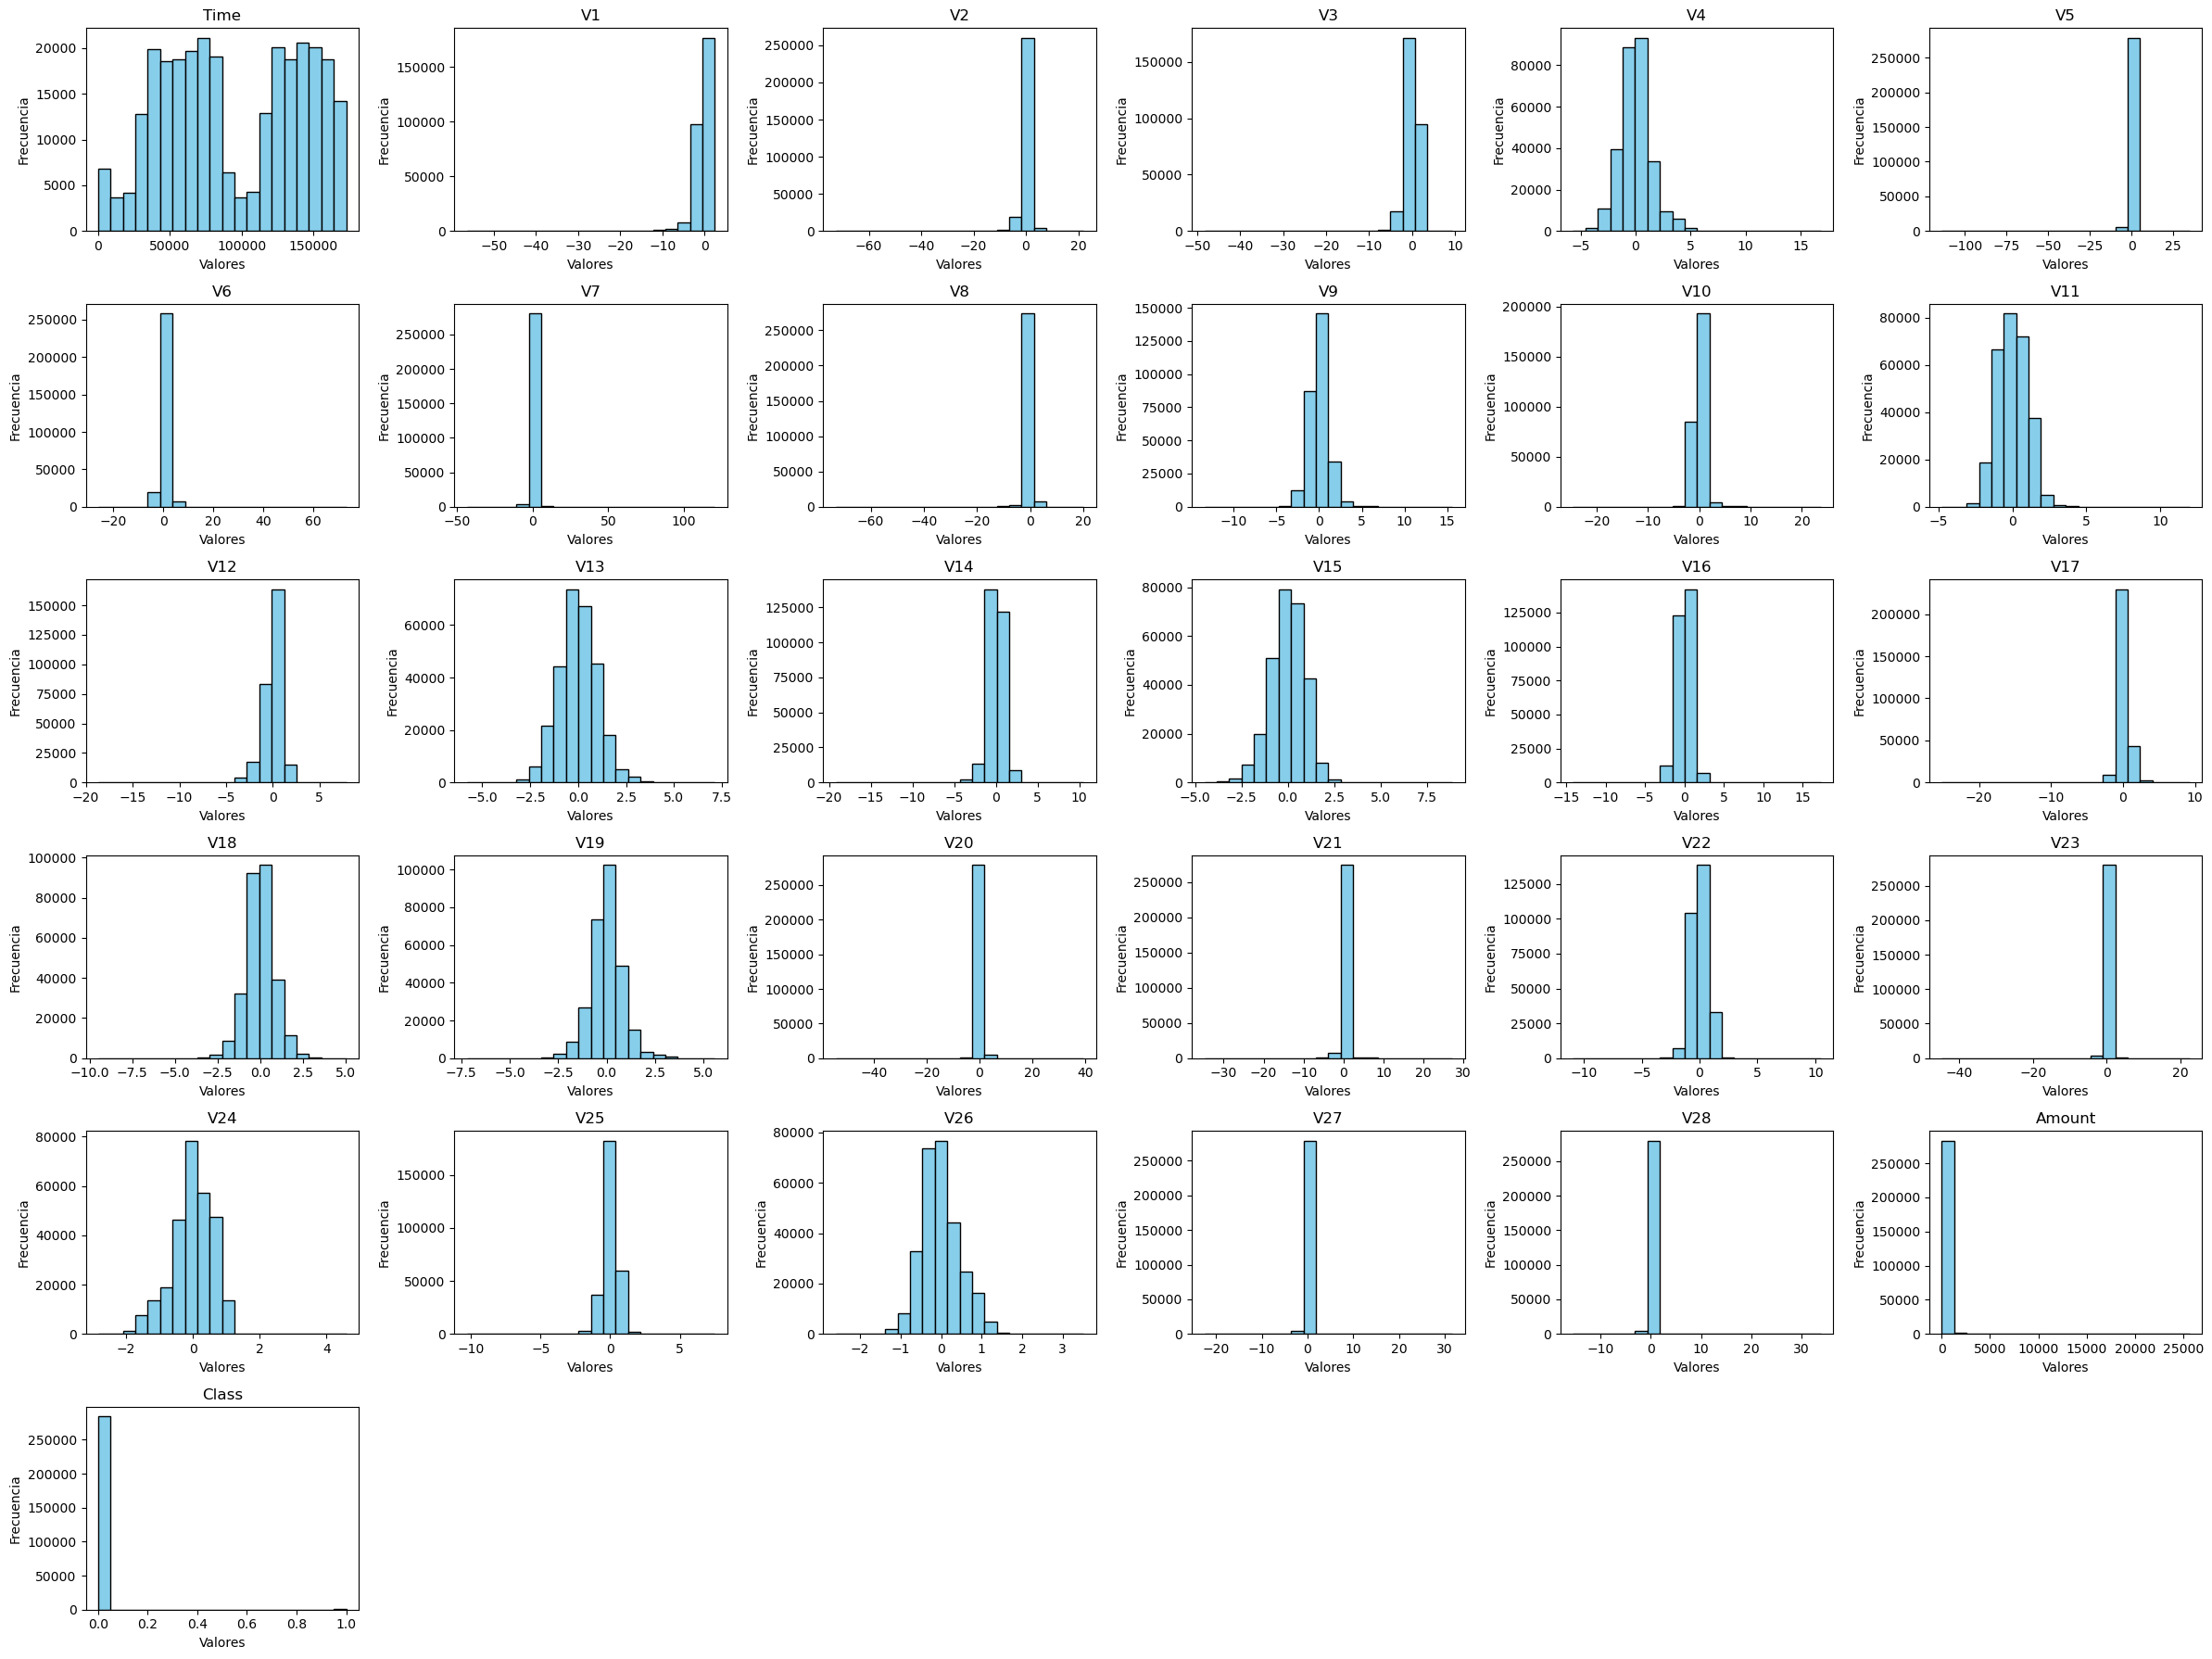

In [6]:
# Número de columnas
num_cols = len(df_limpio.columns)

# Calcula un layout adecuado para las subplots (por ejemplo, en forma de cuadrícula)
cols = int(np.ceil(np.sqrt(num_cols)))   # número de columnas en la figura
rows = int(np.ceil(num_cols / cols))       # número de filas en la figura

fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))

# Si solo hay una fila o una columna, axes puede no ser un array bidimensional
axes = np.array(axes).reshape(-1)
df
# Itera sobre cada columna y crea el histograma
for i, column in enumerate(df_limpio.columns):
    axes[i].hist(df_limpio[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Valores')
    axes[i].set_ylabel('Frecuencia')

# Elimina subplots vacíos si existen
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


por lo que podemos observar los datos no estan correctamente distribuidos, piede de que sea por culpa de outliners o que hay una gran concentracion de datos en pocas variables

Podremos usar los boxplots para identificar cual es el problema

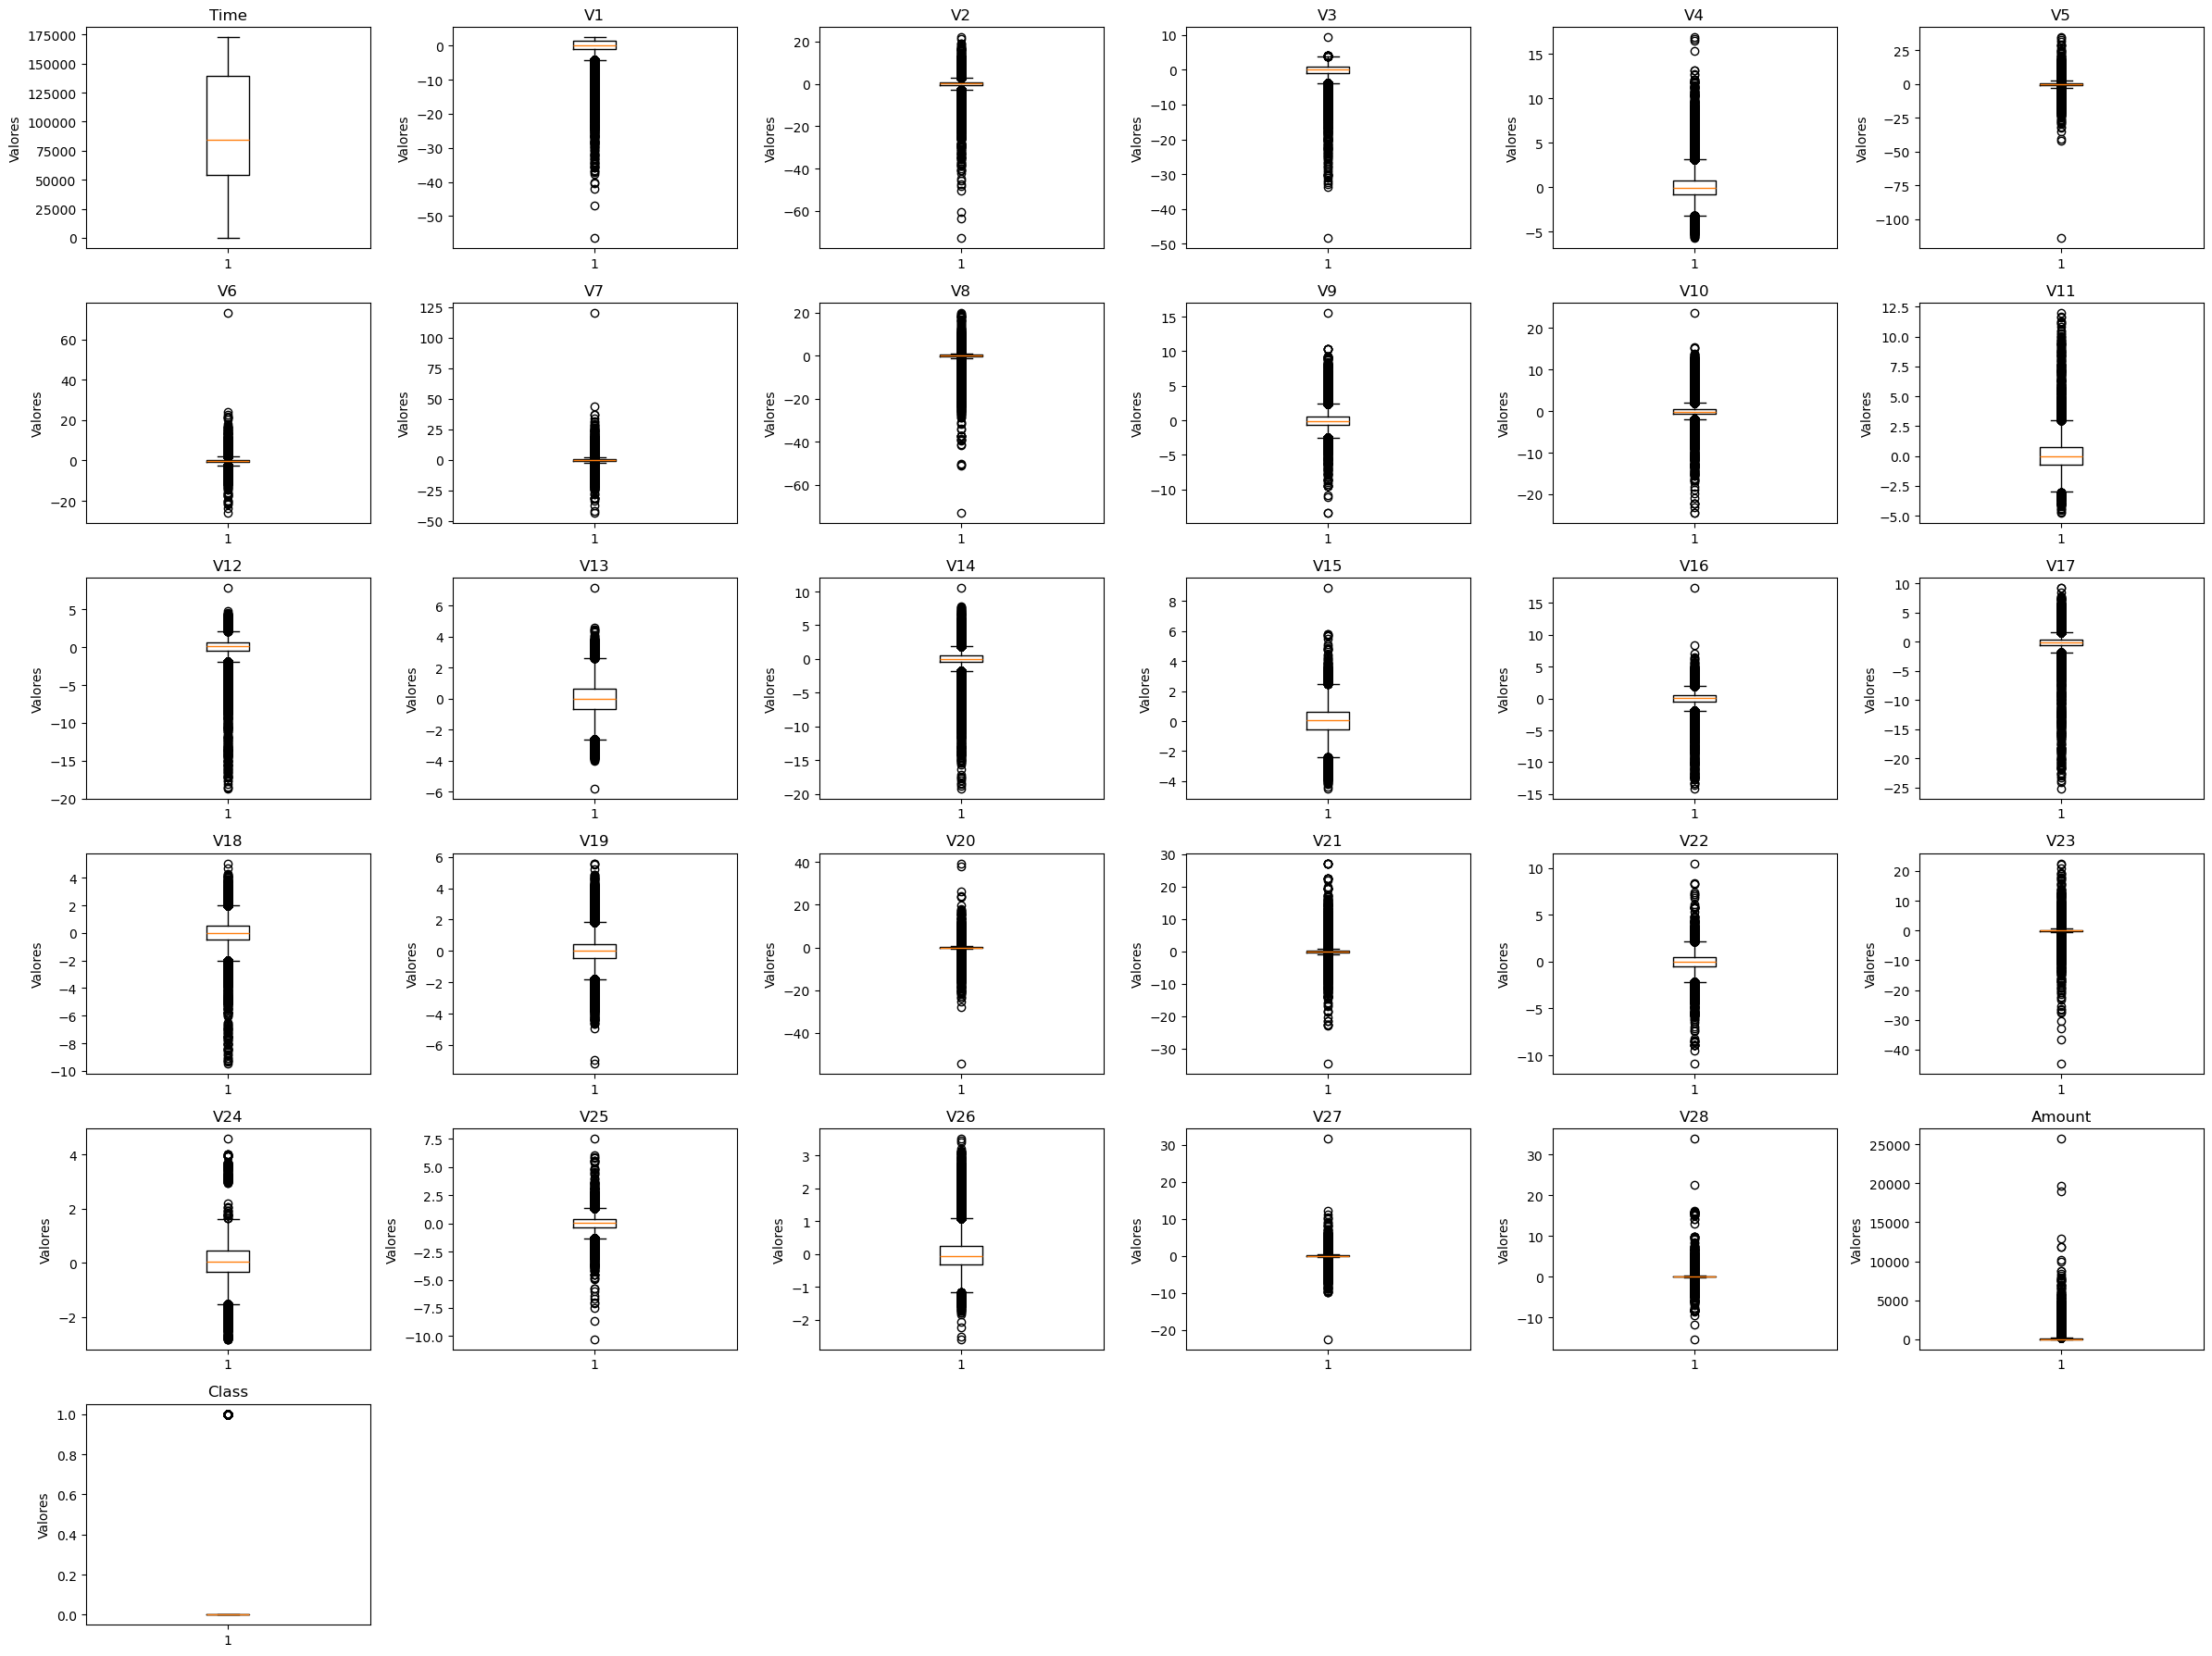

In [7]:
# Número de columnas
num_cols = len(df_limpio.columns)

# Calcula un layout adecuado para las subplots (por ejemplo, en forma de cuadrícula)
cols = int(np.ceil(np.sqrt(num_cols)))   # número de columnas en la figura
rows = int(np.ceil(num_cols / cols))       # número de filas en la figura

fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))

# Aseguramos que axes es un array unidimensional para facilitar la iteración
axes = np.array(axes).reshape(-1)

# Itera sobre cada columna y crea el boxplot
for i, column in enumerate(df_limpio.columns):
    axes[i].boxplot(df_limpio[column].dropna())
    axes[i].set_title(column)
    axes[i].set_ylabel('Valores')

# Elimina subplots vacíos si existen
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Bueno con esto podemos aclarar que esto ocurre por culpa de los outliners voy a revisar con detalle de manera manual si esto es un error o si los datos pueden ofrecer algo relevante.

Bueno despeus de revisar no es que sean errores garrafales pues son datos anomalos que estan muy por fuera de la media lo que hace que se comprima la distribucion, optare por aplicar la winsorizacion pues no queremos perder datos en otras dimenciones que pueden ser importantes y no representen outliners sino informacion valiosa

In [8]:
import pandas as pd
import numpy as np

# Función para winsorizar una serie
def winsorize_series(s, k=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    return s.clip(lower=lower_bound, upper=upper_bound)

# Crea una copia del dataframe para aplicar la winsorización
df_winsorized = df_limpio.copy()

# Selecciona únicamente las columnas numéricas para aplicar la winsorización
numeric_cols = df_winsorized.select_dtypes(include=[np.number]).columns

# Aplica la función a cada columna numérica
for col in numeric_cols:
    df_winsorized[col] = winsorize_series(df_winsorized[col])

# df_winsorized ya contiene los valores winsorizados


En la siguiente grafica podras identificar los datos ya winsorizados

En este tabla observaremos la distribucion

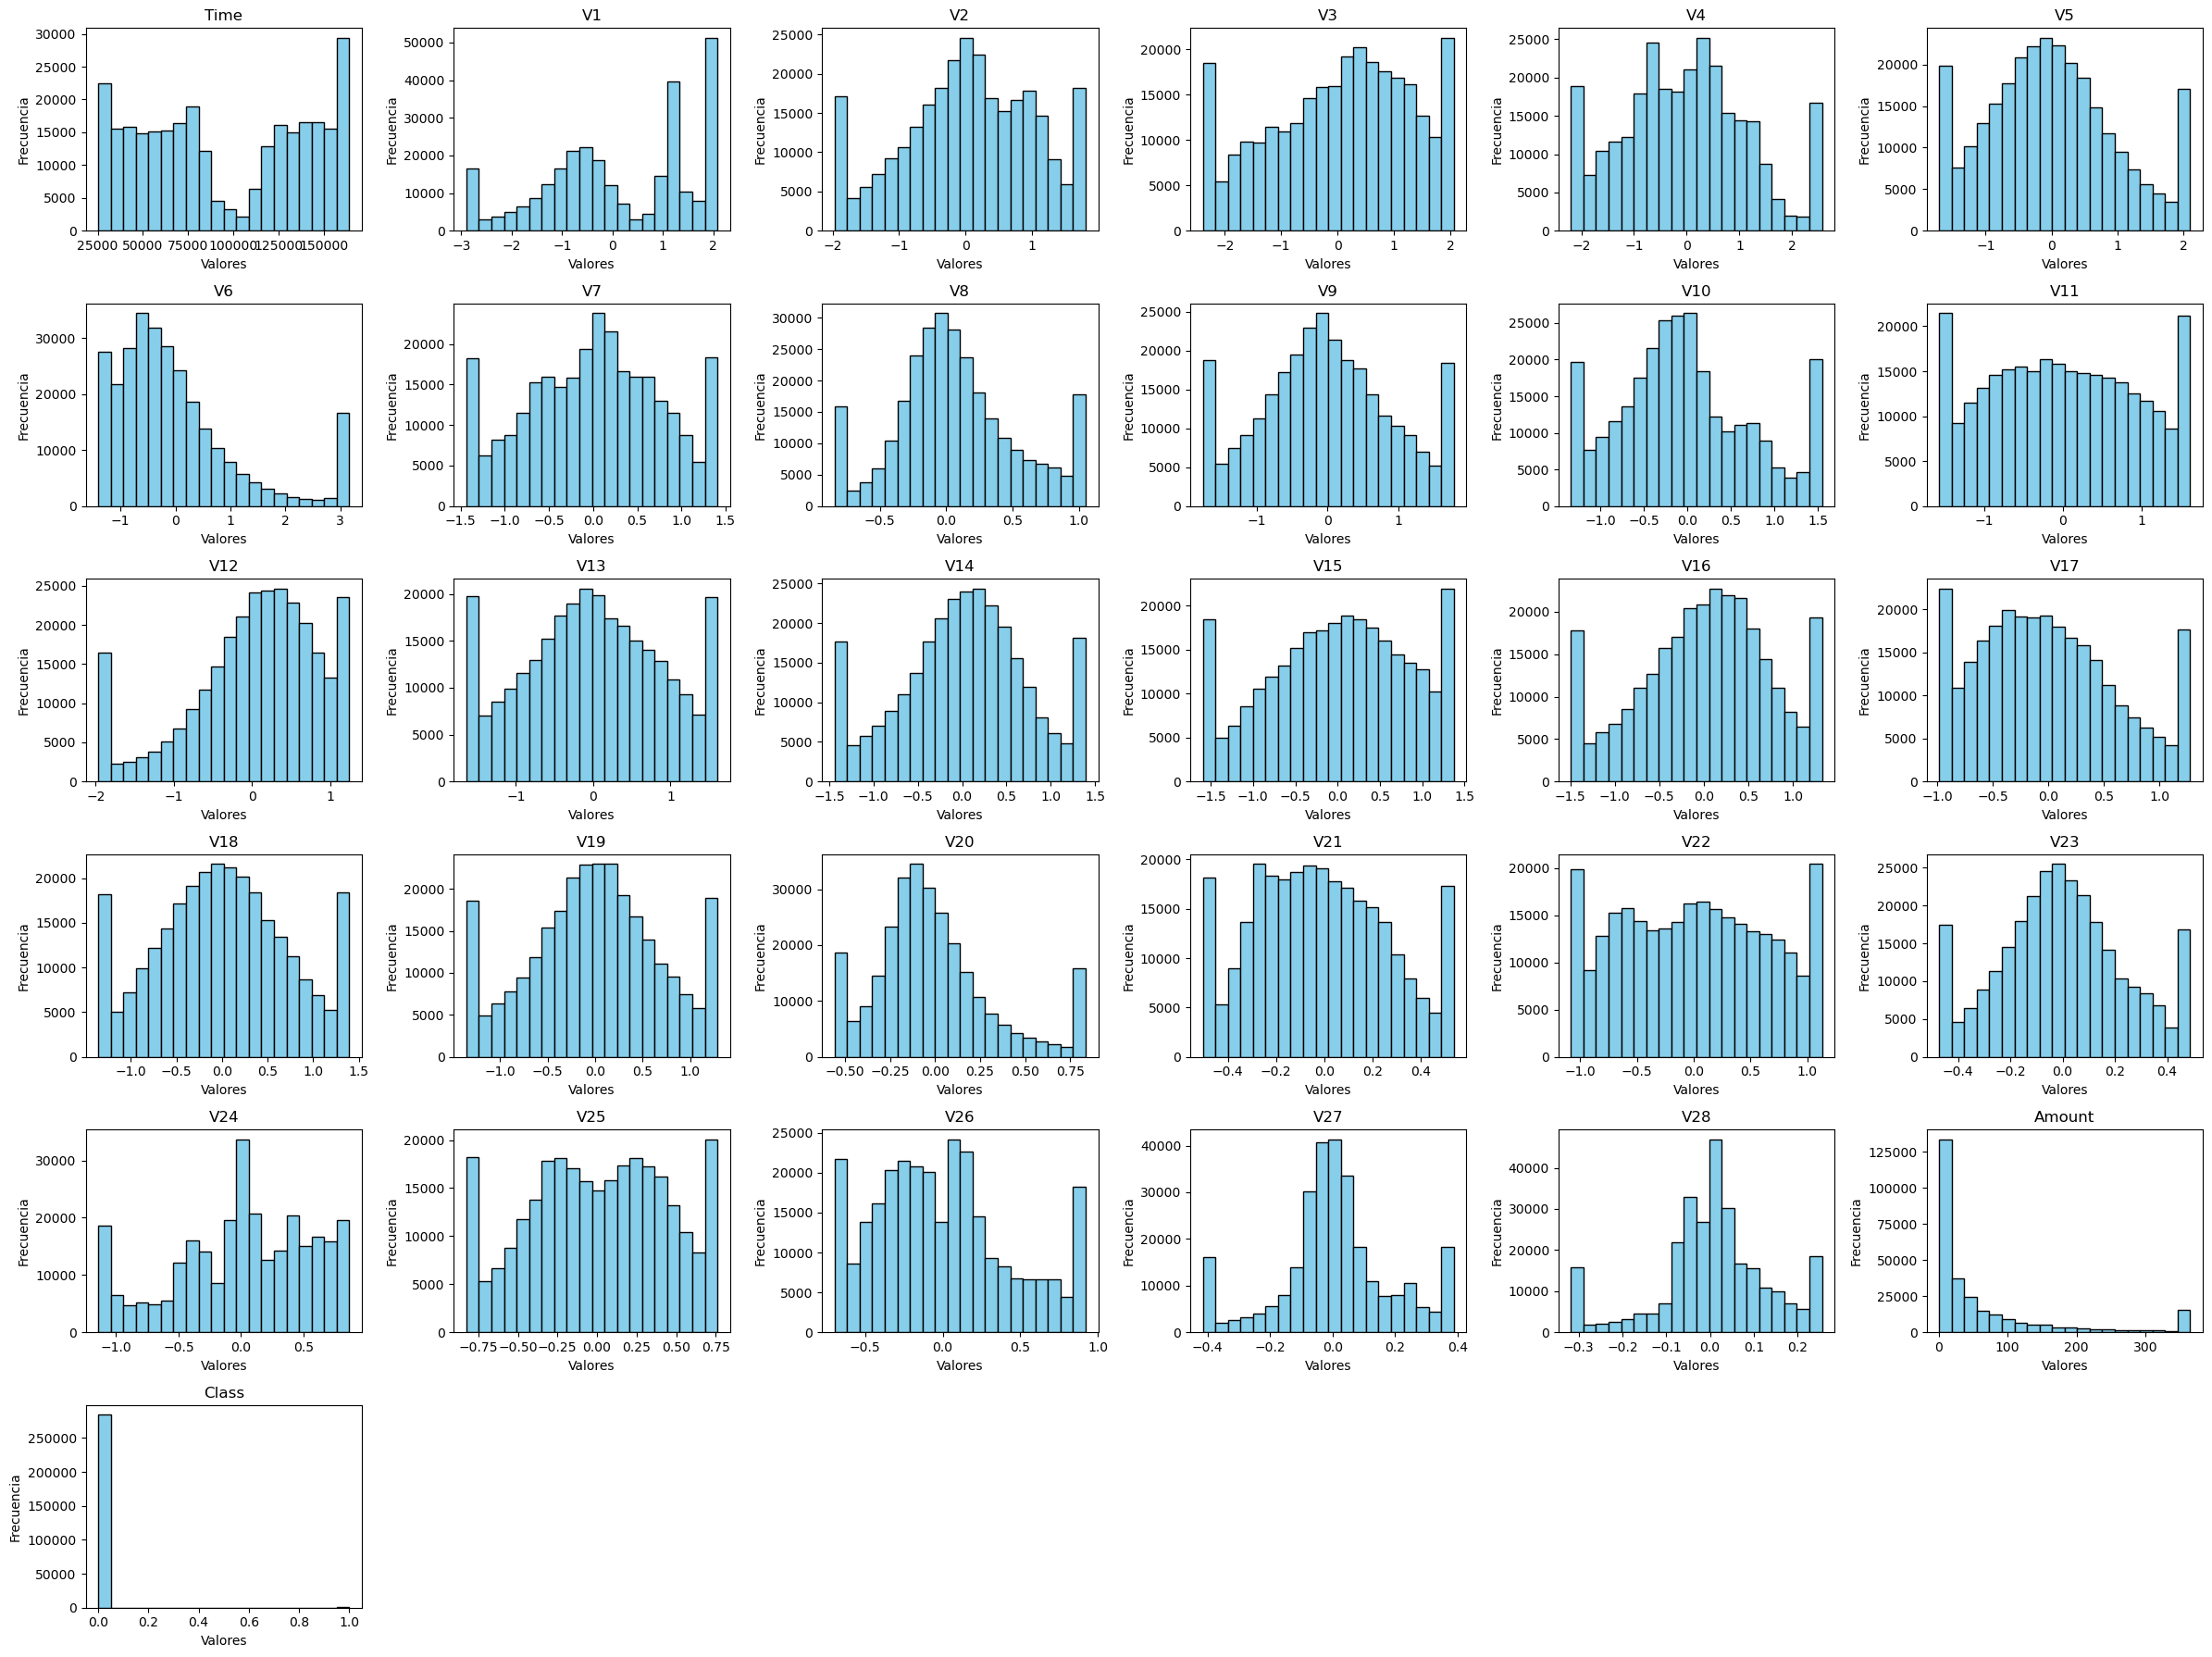

In [9]:
# Define las columnas numéricas a winsorizar, excluyendo "Class"
cols_to_winsorize = [col for col in df.columns if col != 'Class' and np.issubdtype(df[col].dtype, np.number)]

# Crea una copia del DataFrame para almacenar los datos winsorizados
df_winsorized = df.copy()

# Aplica la winsorización a cada columna seleccionada (por ejemplo, recortando el 5% inferior y superior)
for col in cols_to_winsorize:
    df_winsorized[col] = mstats.winsorize(df[col], limits=[0.05, 0.05])

# Calcula el número de columnas para generar los histogramas
num_cols = len(df_winsorized.columns)

# Define un layout adecuado (por ejemplo, forma de cuadrícula)
cols = int(np.ceil(np.sqrt(num_cols)))   # número de columnas en la figura
rows = int(np.ceil(num_cols / cols))       # número de filas en la figura

fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))

# Si solo hay una fila o una columna, axes puede no ser un array bidimensional
axes = np.array(axes).reshape(-1)

# Itera sobre cada columna y crea el histograma
for i, column in enumerate(df_winsorized.columns):
    axes[i].hist(df_winsorized[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Valores')
    axes[i].set_ylabel('Frecuencia')

# Elimina subplots vacíos si existen
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Y en esta otra, observaremos los boxplots

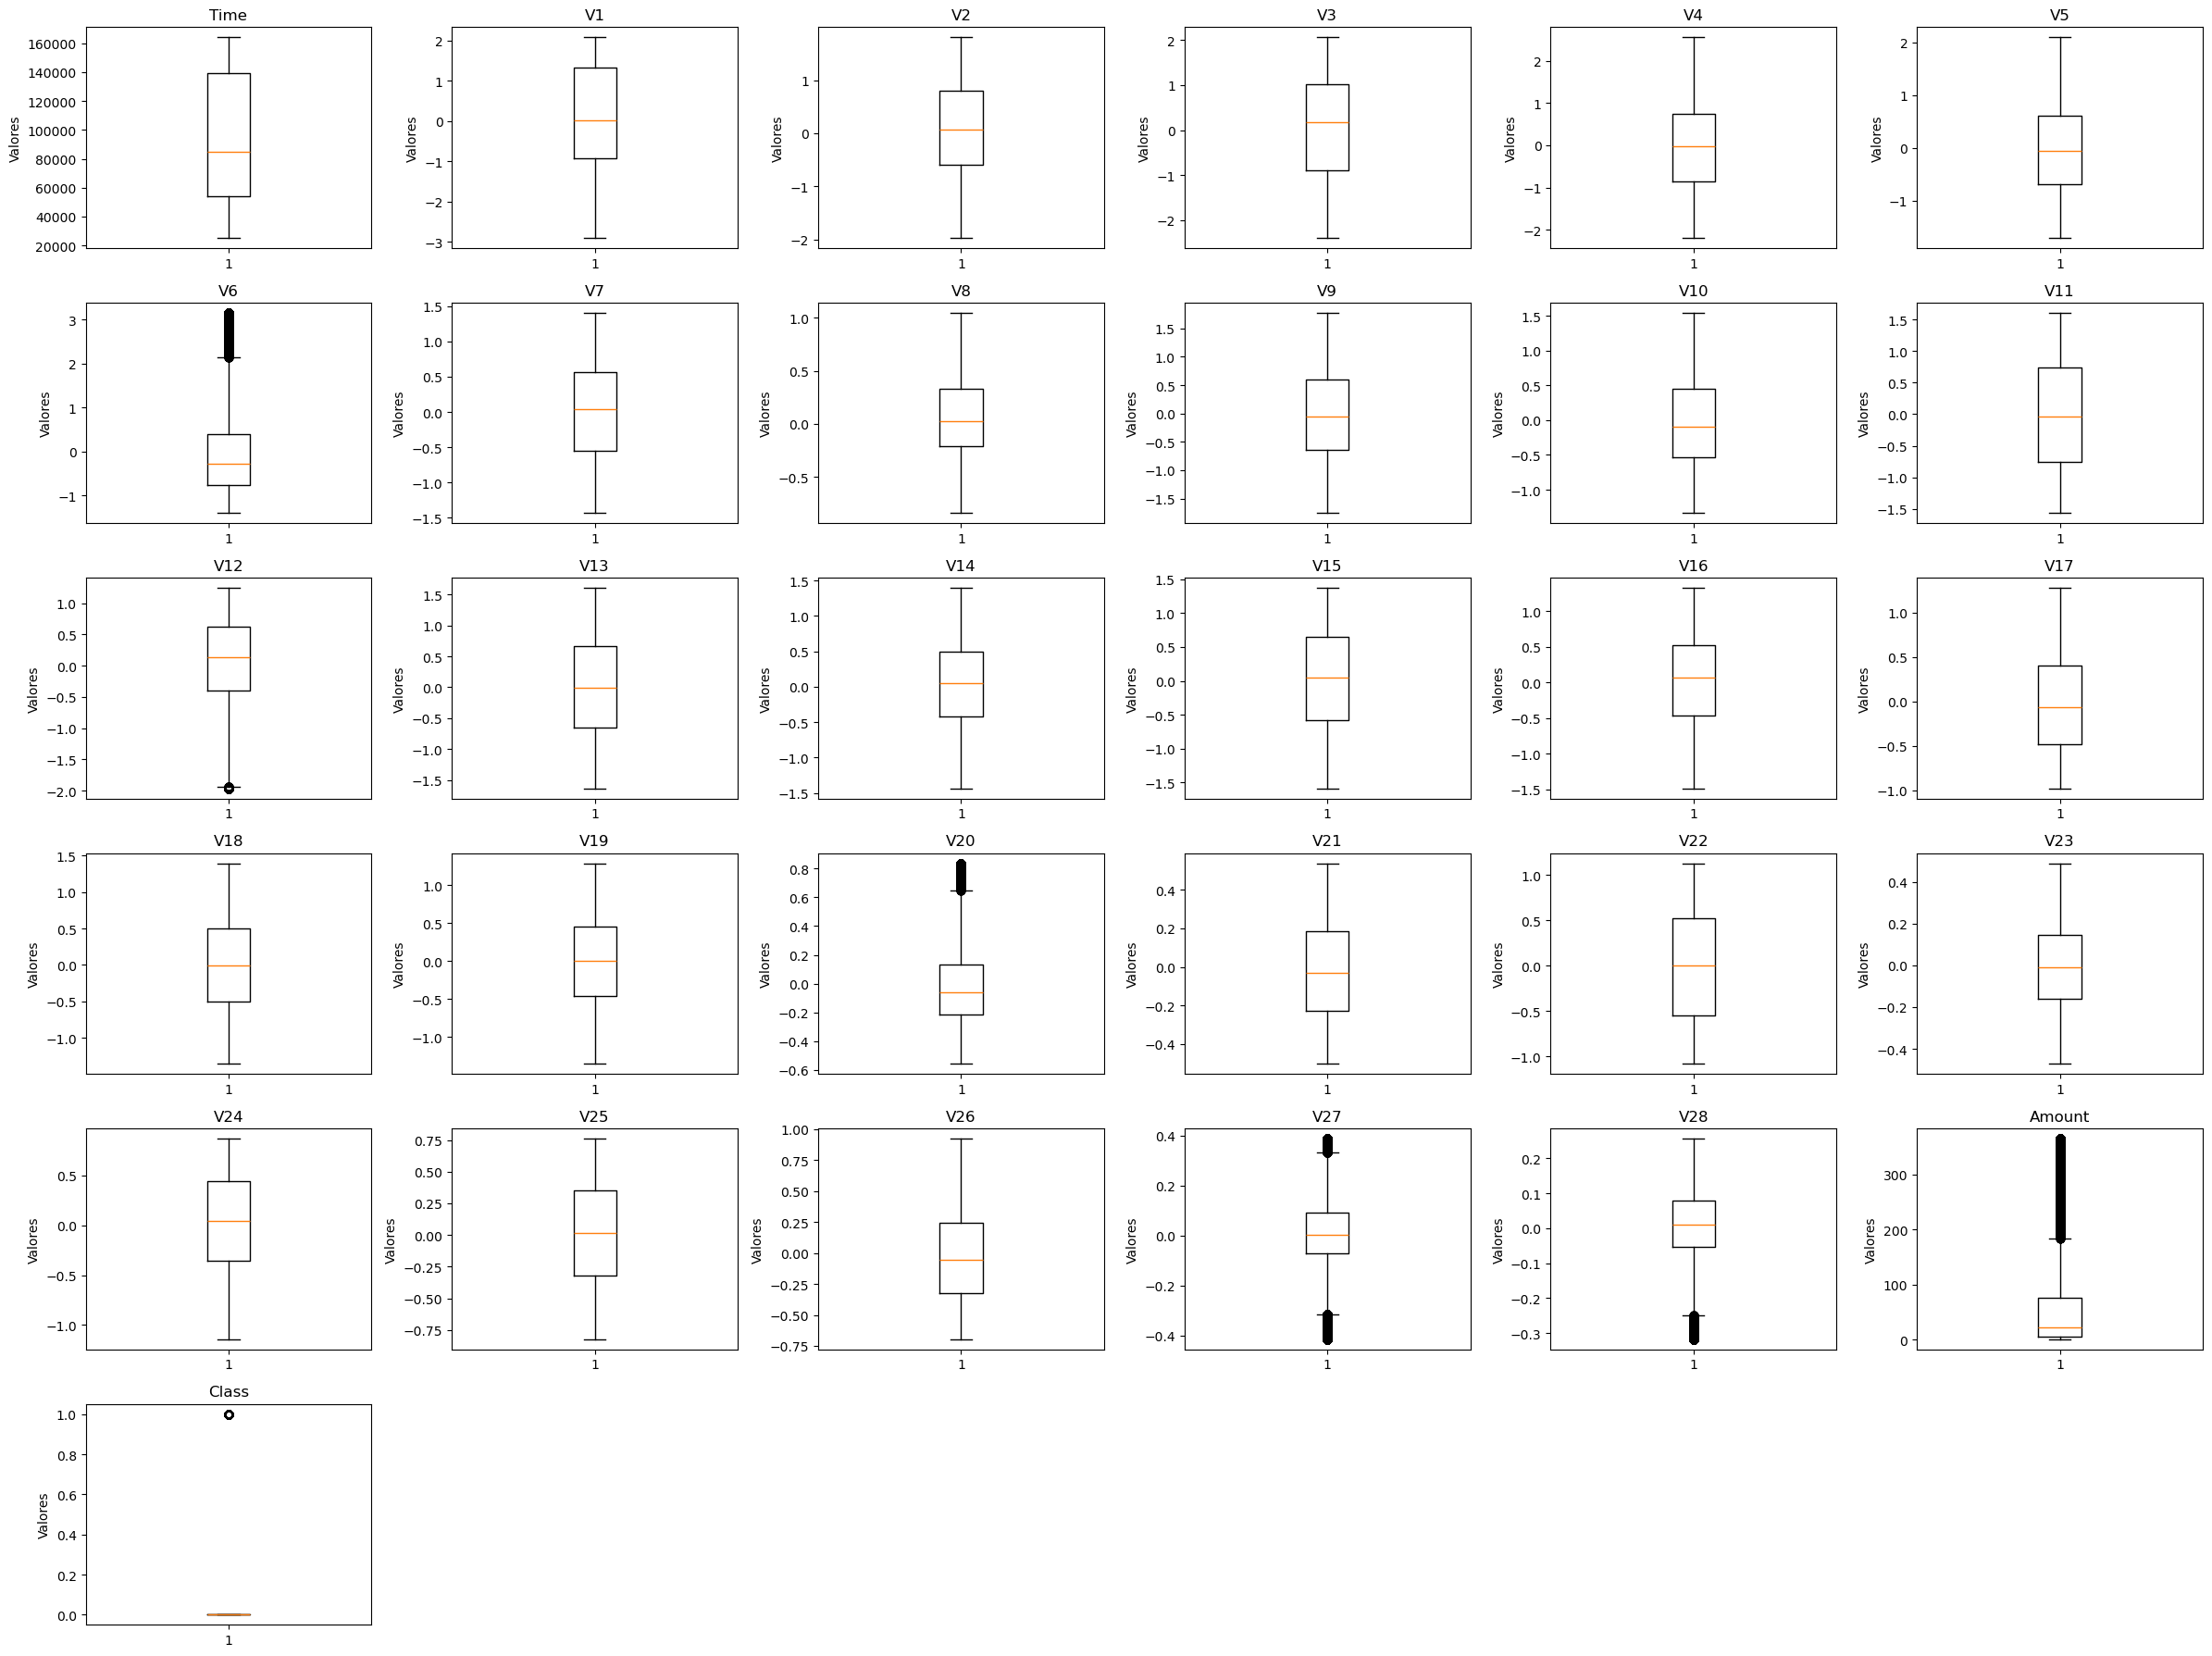

In [10]:
# Número de columnas
num_cols = len(df_winsorized.columns)

# Calcula un layout adecuado para las subplots (por ejemplo, en forma de cuadrícula)
cols = int(np.ceil(np.sqrt(num_cols)))   # número de columnas en la figura
rows = int(np.ceil(num_cols / cols))       # número de filas en la figura

fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))

# Aseguramos que axes es un array unidimensional para facilitar la iteración
axes = np.array(axes).reshape(-1)

# Itera sobre cada columna y crea el boxplot
for i, column in enumerate(df_winsorized.columns):
    axes[i].boxplot(df_winsorized[column].dropna())
    axes[i].set_title(column)
    axes[i].set_ylabel('Valores')

# Elimina subplots vacíos si existen
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Conclusion:

como podemos observar los datos winzoronisados ya no presentan esa comprension dada por datos anomalos alejada de la media ya con esto podemos mejorar nuestro analisis ya que los datos: 

Reducción de la distorsión causada por outliers:
Winsorizar limita los valores extremos, evitando que sesguen la media y la desviación estándar, lo que proporciona un análisis más representativo.

Mantención de la estructura de la distribución:
A diferencia de eliminar outliers, la winsorización conserva todas las observaciones, permitiendo analizar la distribución original con menos compresión.

Mejora en la estabilidad de modelos estadísticos y de machine learning:
Al controlar los valores extremos, se reducen los efectos adversos en algoritmos sensibles, logrando ajustes más robustos y fiables.

Facilitación en la interpretación de métricas descriptivas:
Con la winsorización, medidas como la media y la desviación estándar reflejan mejor la tendencia central y la dispersión real de los datos.

Optimización para análisis que dependen de distribuciones bien comportadas:
Métodos estadísticos paramétricos (por ejemplo, ANOVA, correlaciones) se benefician al trabajar con datos que muestran menos sesgo y colas largas.

Ahi otra observacion muy importante y es la cantidad de filas que son 1 y que son 0 en la columna class que es pacticamente la columna obejtivo mientras que la clasificacion con valr sero representan mas de 200000 datos, la clasificacion 1 representa apenas menos de 500 datos

#Ahora procederemos con la estandarizacion de los datos mis razones son debido a que la mayoria de modelos de achine learning como XGBoost Regresion logistica y KNN, se benefician de los datos estandarizados.

Aqui esta el codigo con los datos estandarizados

Ahi que aclarar que ademas de estandarizarlo tambien los he dividido por:
1. 70% train
2. 15% test
3. 15% validation

In [11]:
# Separar las características (X) y la variable objetivo (y)
X = df_winsorized.drop(columns=["Class"])  # Todas las columnas excepto "Class"
y = df_winsorized["Class"]  # Variable objetivo

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en 70% entrenamiento, 15% validación, 15% prueba
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Verificar tamaños
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# Convertir a DataFrame si es necesario
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train["Class"] = y_train.values

df_val = pd.DataFrame(X_val, columns=X.columns)
df_val["Class"] = y_val.values

df_test = pd.DataFrame(X_test, columns=X.columns)
df_test["Class"] = y_test.values



print("Datasets guardados correctamente.")

Train: (199364, 30), Validation: (42721, 30), Test: (42722, 30)
Datasets guardados correctamente.


Ahora procederemos a entrenar los modelos 

## Preguntas a Resolver

1. Comparación y desempeño de modelos de clasificación
¿Cómo se comportan los modelos KNN, Regresión Logística y XGBoost en la detección de fraudes, especialmente en un contexto de datos altamente desbalanceados?
Subpregunta: ¿Qué diferencias se observan en métricas como AUC-ROC y AUPRC entre estos modelos?

2. Manejo del desbalanceo de clases
¿Qué técnicas de balanceo (undersampling, oversampling, SMOTE, etc.) resultan más efectivas para mejorar la detección de fraudes en este conjunto de datos?
Subpregunta: ¿Cómo influye la técnica de balanceo en la estabilidad y generalización de los modelos?

3. Impacto de la transformación de características
¿Cuál es el efecto de la transformación mediante PCA sobre la interpretabilidad y el rendimiento predictivo de los modelos?
Subpregunta: ¿Es posible extraer información relevante o identificar patrones significativos a partir de los componentes principales?

4. Calibración de probabilidades y umbrales de decisión
¿Cómo se pueden calibrar las probabilidades generadas por los modelos para optimizar la detección de fraudes, dado el desbalance extremo del dataset?
Subpregunta: ¿Qué estrategias (por ejemplo, ajuste de umbrales, técnicas de calibración) permiten obtener mejores interpretaciones del riesgo crediticio?

5. Evaluación de la robustez y capacidad de generalización
¿Qué metodologías de validación y métricas adicionales (además de AUC-ROC) son recomendables para evaluar la robustez de los modelos en este contexto?
Subpregunta: ¿Cómo se comportan los modelos ante nuevos datos o en escenarios simulados que imitan transacciones en tiempo real?

6. Desafíos y limitaciones en la implementación práctica
¿Cuáles son los principales desafíos y limitaciones al aplicar estos modelos de detección de fraude en un entorno real?
Subpregunta: ¿Cómo pueden abordarse problemas como el costo asociado a falsos positivos o la falta de interpretabilidad en algunos algoritmos?

## ¿Cómo se comportan los modelos KNN, Regresión Logística y XGBoost en la detección de fraudes, especialmente en un contexto de datos altamente desbalanceados?



En el contexto de detección de fraudes —como en transacciones con tarjetas de crédito donde solo el **0.172%** de los casos son fraudulentos— es crucial comprender las fortalezas y limitaciones de distintos modelos de clasificación. A continuación, se detalla el comportamiento, ventajas y desventajas de tres algoritmos comúnmente utilizados en este tipo de problemas.

---

## K-Nearest Neighbors (KNN)

**Naturaleza del modelo:**  
KNN es un algoritmo basado en la distancia que clasifica nuevas instancias según la mayoría de los vecinos más cercanos en el espacio de características.

### Comportamiento en datos desbalanceados

- **Sensibilidad al desbalance:**  
  La presencia de una clase mayoritaria provoca que los vecinos más cercanos de una transacción fraudulenta pertenezcan, con alta probabilidad, a la clase legítima. Esto genera un sesgo que afecta negativamente la detección de fraudes.

- **Dependencia de la métrica de distancia:**  
  A pesar de contar con datos estandarizados, la cercanía en el espacio de características no necesariamente refleja la estructura subyacente que diferencia las clases.

- **Interpretabilidad limitada:**  
  Ajustar el valor de *k* y otros hiperparámetros puede ser complicado y no garantiza una mejora sustancial en escenarios desbalanceados.

---

## Regresión Logística

**Naturaleza del modelo:**  
Modelo lineal que estima probabilidades mediante la función logística. Es altamente interpretable y eficiente para problemas lineales.

### Comportamiento en datos desbalanceados

- **Tendencia a favorecer la clase mayoritaria:**  
  Sin técnicas de ajuste (como pesos de clase o muestreo), el modelo tiende a clasificar la mayoría de las transacciones como legítimas, reduciendo la detección de fraudes.

- **Eficiencia y rapidez:**  
  Su simplicidad facilita entrenamientos rápidos y resultados interpretables, aspecto valioso en contextos regulatorios y de auditoría.

- **Mejoras posibles:**  
  Aplicando técnicas como **SMOTE**, **submuestreo** o **ponderación de clases**, es posible aumentar su sensibilidad hacia la clase minoritaria.

---

## XGBoost

**Naturaleza del modelo:**  
Algoritmo de boosting basado en árboles de decisión, diseñado para capturar relaciones no lineales complejas e interacciones entre variables.

### Comportamiento en datos desbalanceados

- **Robustez y capacidad predictiva:**  
  Gracias a su enfoque iterativo, XGBoost puede corregir errores de iteraciones previas y mejorar la identificación de fraudes.

- **Parámetros específicos para desbalance:**  
  Incluye opciones como `scale_pos_weight` que permiten ajustar la penalización asociada a la clase minoritaria.

- **Riesgo de sobreajuste:**  
  Su potencia predictiva requiere una cuidadosa validación y ajuste de hiperparámetros para evitar sobreentrenamiento, especialmente en contextos de alta desproporción entre clases.

---

## Consideraciones Adicionales para la Evaluación

### Métricas de rendimiento

Debido al desbalance extremo, métricas como la **Precisión-Recall AUC (AUPRC)** son más informativas que la **exactitud** o incluso la **ROC AUC**, ya que enfocan la evaluación en la capacidad del modelo para identificar correctamente la clase minoritaria.

### Preprocesamiento adecuado

El dataset ya se encuentra limpio (sin outliers, sin valores faltantes, estandarizado), por lo que la atención principal debe centrarse en mitigar el desbalance entre clases.

### Estrategias complementarias

- **Ensembles híbridos:**  
  Combinación de modelos y técnicas de muestreo para mejorar la sensibilidad del sistema.
  
- **Clasificación cost-sensitive:**  
  Incorporar penalizaciones diferenciadas para minimizar el costo de los falsos negativos (fraudes no detectados).

---

## Resumen Comparativo

| Modelo              | Ventajas                                                       | Limitaciones                                                   |
|--------------------|---------------------------------------------------------------|---------------------------------------------------------------|
| **KNN**           | Simple, no paramétrico                                         | Sensible al desbalance, dependencia en la métrica de distancia |
| **Regresión Logística** | Rápido, interpretable, eficiente                          | Requiere técnicas de ajuste para datos desbalanceados         |
| **XGBoost**      | Potente, ajustable, robusto frente a relaciones no lineales    | Riesgo de sobreajuste, mayor complejidad                      |

---

> **Conclusión:**  
Cada uno de estos modelos puede ser efectivo si se implementan técnicas adecuadas para abordar el desbalance de clases. La elección dependerá de la combinación óptima entre interpretabilidad, capacidad de generalización, eficiencia y complejidad del problema.



## ¿Qué diferencias se observan en métricas como AUC-ROC y AUPRC entre estos modelos?

### Comparación de Métricas: AUC-ROC vs AUPRC en Modelos de Detección de Fraude

En escenarios de detección de fraudes, donde la clase minoritaria (fraude) es extremadamente escasa, se observa que las métricas **AUC-ROC** y **AUPRC** ofrecen perspectivas distintas sobre el desempeño de los modelos. A continuación, se detalla una comparación académica, profesional y rigurosa de ambas métricas:

---

### AUC-ROC (Área Bajo la Curva ROC)

- **Sensibilidad al desbalance:**  
  La AUC-ROC evalúa la capacidad del modelo para diferenciar entre clases en general. Sin embargo, en contextos altamente desbalanceados, una alta cantidad de verdaderos negativos puede inflar el valor de esta métrica, enmascarando la deficiente detección de la clase fraudulenta.

- **Comparación entre modelos:**  
  - *KNN y Regresión Logística:* Suelen mostrar valores moderados, indicando una capacidad razonable para discriminar entre clases, aunque no se refleje completamente la detección de fraudes.  
  - *XGBoost:* Generalmente obtiene valores elevados debido a su robustez y capacidad para modelar relaciones complejas, aunque esto podría no traducirse en una mejora sustancial en la identificación de la clase minoritaria.

---

### AUPRC (Área Bajo la Curva de Precisión-Recall)

- **Enfoque en la clase minoritaria:**  
  La AUPRC se centra en la precisión y el recall, lo que la hace especialmente sensible al desempeño en la detección de fraudes. Esta métrica ofrece una visión más realista de la capacidad del modelo para identificar correctamente la clase minoritaria.

- **Comparación entre modelos:**  
  - *KNN:* Tiende a presentar una AUPRC baja, ya que su dependencia en la métrica de distancia lo penaliza en contextos desbalanceados.  
  - *Regresión Logística:* Puede alcanzar valores moderados en AUPRC, pero generalmente requiere técnicas de balanceo (como ponderación de clases o muestreo) para mejorar su rendimiento.  
  - *XGBoost:* Con un ajuste adecuado (por ejemplo, utilizando el parámetro `scale_pos_weight`), suele lograr una AUPRC significativamente superior, demostrando una mayor eficacia en la detección de fraudes.

---

### Conclusión

En resumen, la **AUC-ROC** puede resultar engañosa en escenarios con un alto desbalance de clases, ya que no enfatiza lo suficiente la detección de la clase minoritaria. Por otro lado, la **AUPRC** se muestra como una métrica más adecuada para evaluar el desempeño en detección de fraudes, al focalizarse en la precisión y el recall de la clase de interés. Por ello, en la práctica, se recomienda priorizar la AUPRC al comparar y optimizar modelos en este tipo de problemas.


# Testeo de modelos

## KNN

Train: (199364, 30), Validation: (42721, 30), Test: (42722, 30)
Datasets guardados correctamente.


Evaluando k valores:   0%|          | 0/20 [00:00<?, ?it/s]c:\Users\spinz\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\spinz\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
Evaluando k valores: 100%|██████████| 20/20 [05:41<00:00, 17.09s/it]


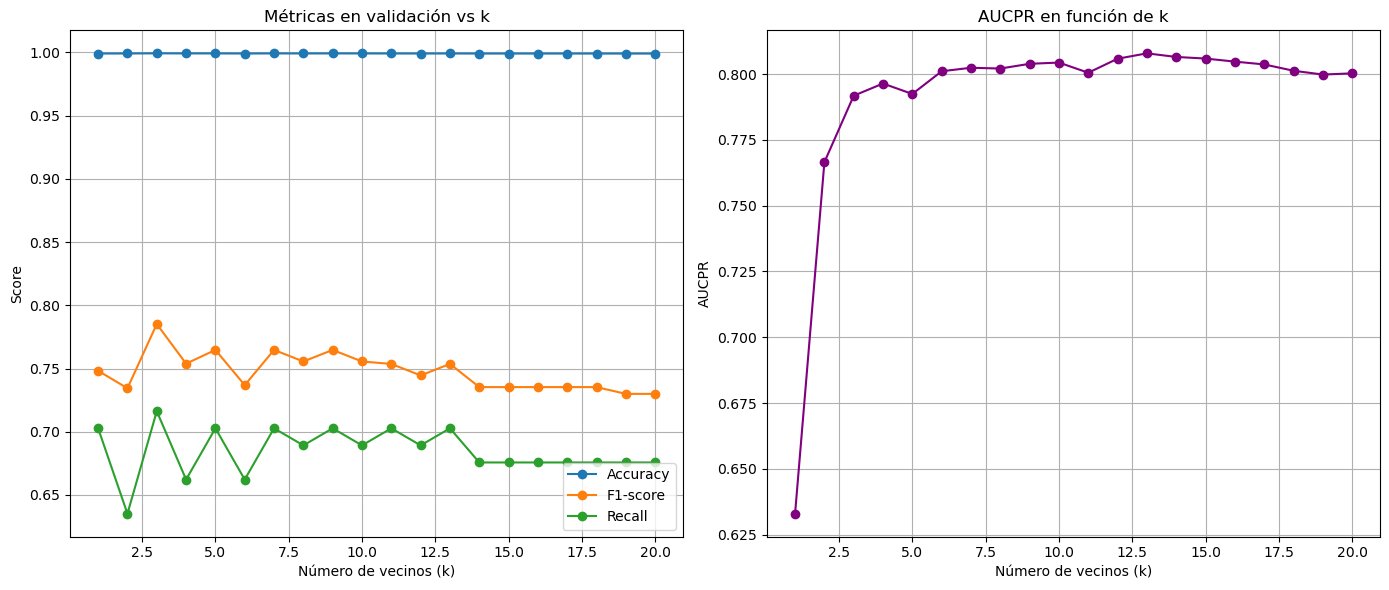

Evaluación en el conjunto de validación:
Accuracy: 0.9993
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.84      0.70      0.76        74

    accuracy                           1.00     42721
   macro avg       0.92      0.85      0.88     42721
weighted avg       1.00      1.00      1.00     42721

Matriz de confusión:
[[42637    10]
 [   22    52]]

Evaluación en el conjunto de prueba:
Accuracy: 0.9995
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.92      0.76      0.83        74

    accuracy                           1.00     42722
   macro avg       0.96      0.88      0.91     42722
weighted avg       1.00      1.00      1.00     42722

Matriz de confusión:
[[42643     5]
 [   18    56]]


In [12]:
from tqdm import tqdm

# Verificar tamaños
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# (Opcional) Convertir a DataFrame para guardar los datasets
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train["Class"] = y_train.values

df_val = pd.DataFrame(X_val, columns=X.columns)
df_val["Class"] = y_val.values

df_test = pd.DataFrame(X_test, columns=X.columns)
df_test["Class"] = y_test.values

print("Datasets guardados correctamente.")

# =====================
# MODELO KNN Y EVALUACIÓN CON GRÁFICAS
# =====================

# Evaluar el desempeño del modelo KNN en función del número de vecinos (k)
k_values = list(range(1, 21))
accuracy_scores = []
f1_scores = []
recall_scores = []
aucpr_scores = []  # Lista para almacenar AUCPR para cada k

# Se utiliza tqdm para mostrar el progreso del loop
for k in tqdm(k_values, desc="Evaluando k valores"):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Evaluación en el conjunto de validación
    y_val_pred = knn.predict(X_val)
    accuracy_scores.append(accuracy_score(y_val, y_val_pred))
    f1_scores.append(f1_score(y_val, y_val_pred, average='binary'))
    recall_scores.append(recall_score(y_val, y_val_pred, average='binary'))
    
    # Evaluación del AUCPR en el conjunto de prueba
    y_scores = knn.predict_proba(X_test)[:, 1]
    aucpr = average_precision_score(y_test, y_scores)
    aucpr_scores.append(aucpr)

# Crear figura con dos subplots:
# 1. Métricas en función de k (accuracy, f1 y recall)
# 2. AUCPR en función de k
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Métricas en función de k (líneas con puntos)
ax1.plot(k_values, accuracy_scores, marker='o', label='Accuracy')
ax1.plot(k_values, f1_scores, marker='o', label='F1-score')
ax1.plot(k_values, recall_scores, marker='o', label='Recall')
ax1.set_xlabel('Número de vecinos (k)')
ax1.set_ylabel('Score')
ax1.set_title('Métricas en validación vs k')
ax1.legend()
ax1.grid(True)

# Gráfico 2: AUCPR en función de k
ax2.plot(k_values, aucpr_scores, marker='o', color='purple')
ax2.set_xlabel('Número de vecinos (k)')
ax2.set_ylabel('AUCPR')
ax2.set_title('AUCPR en función de k')
ax2.grid(True)

plt.tight_layout()
plt.show()

# =====================
# Evaluación adicional en conjuntos de validación y prueba para k=5 (ejemplo)
# =====================
k_selected = 7
knn_best = KNeighborsClassifier(n_neighbors=k_selected)
knn_best.fit(X_train, y_train)

# Validación
y_val_pred = knn_best.predict(X_val)
print("Evaluación en el conjunto de validación:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print("Reporte de clasificación:")
print(classification_report(y_val, y_val_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_val_pred))

# Prueba
y_test_pred = knn_best.predict(X_test)
print("\nEvaluación en el conjunto de prueba:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_test_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_test_pred))


In [19]:
from rich.table import Table
from rich.console import Console
from sklearn.metrics import roc_auc_score

# --- Predicciones y probabilidades en el conjunto de TRAIN ---
y_train_pred = knn_best.predict(X_train)
y_train_probs = knn_best.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_aucpr = average_precision_score(y_train, y_train_probs)
train_aucroc = roc_auc_score(y_train, y_train_probs)

# --- Predicciones y probabilidades en el conjunto de VALIDATION ---
y_val_pred = knn_best.predict(X_val)
y_val_probs = knn_best.predict_proba(X_val)[:, 1]

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_aucpr = average_precision_score(y_val, y_val_probs)
val_aucroc = roc_auc_score(y_val, y_val_probs)

# --- Predicciones y probabilidades en el conjunto de TEST ---
y_test_pred = knn_best.predict(X_test)
y_test_probs = knn_best.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_aucpr = average_precision_score(y_test, y_test_probs)
test_aucroc = roc_auc_score(y_test, y_test_probs)

# --- Crear la tabla con rich ---
table = Table(title="Mejor Optimización - Evaluación del Modelo KNN")

table.add_column("Dataset", style="cyan", no_wrap=True)
table.add_column("Accuracy", justify="center")
table.add_column("F1-Score", justify="center")
table.add_column("Recall", justify="center")
table.add_column("AUCPR", justify="center")
table.add_column("AUCROC", justify="center")

# Agregar fila para el conjunto de TRAIN
table.add_row(
    "Train",
    f"{train_accuracy:.4f}",
    f"{train_f1:.4f}",
    f"{train_recall:.4f}",
    f"{train_aucpr:.4f}",
    f"{train_aucroc:.4f}"
)

# Agregar fila para el conjunto de VALIDATION
table.add_row(
    "Validation",
    f"{val_accuracy:.4f}",
    f"{val_f1:.4f}",
    f"{val_recall:.4f}",
    f"{val_aucpr:.4f}",
    f"{val_aucroc:.4f}"
)

# Agregar fila para el conjunto de TEST
table.add_row(
    "Test",
    f"{test_accuracy:.4f}",
    f"{test_f1:.4f}",
    f"{test_recall:.4f}",
    f"{test_aucpr:.4f}",
    f"{test_aucroc:.4f}"
)

# Mostrar la tabla en consola
console = Console()
console.print(table)


c:\Users\spinz\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\spinz\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\spinz\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\spinz\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


        Mejor Optimización - Evaluación del Modelo KNN         
┏━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃ Dataset    ┃ Accuracy ┃ F1-Score ┃ Recall ┃ AUCPR  ┃ AUCROC ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│ Train      │  0.9995  │  0.8477  │ 0.7849 │ 0.9154 │ 0.9999 │
│ Validation │  0.9993  │  0.7647  │ 0.7027 │ 0.7125 │ 0.9051 │
│ Test       │  0.9995  │  0.8296  │ 0.7568 │ 0.8024 │ 0.9187 │
└────────────┴──────────┴──────────┴────────┴────────┴────────┘

## Regresion Logistica

### Elementos Clave en la Regresión Logística con Fórmulas Matemáticas

1. **Función Sigmoide**  
   La base de la regresión logística es la función sigmoide, que transforma la combinación lineal de características en probabilidades:
   $$
   h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
   $$

2. **Parámetro de Regularización (\(C\) o \(\lambda\))**  
   - En la función de costo regularizada (para **L2**), se minimiza:
     $$
     J(\theta) = -\frac{1}{m}\sum_{i=1}^m \Biggl[ y^{(i)} \log\bigl(h_\theta(x^{(i)})\bigr) + \bigl(1-y^{(i)}\bigr) \log\bigl(1-h_\theta(x^{(i)})\bigr) \Biggr] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2
     $$
   - Donde \(C\) es el inverso de \(\lambda\):
     $$
     C = \frac{1}{\lambda}
     $$
   Esto implica que valores altos de \(C\) (baja \(\lambda\)) reducen la penalización, pudiendo conducir a sobreajuste, mientras que valores bajos de \(C\) (alta \(\lambda\)) aumentan la penalización, lo que puede ocasionar subajuste.

3. **Tipo de Regularización**  
   - **L1 (Lasso)**:  
     Utiliza la norma \(L_1\) para penalizar la suma de los valores absolutos de los coeficientes, lo que puede inducir a que algunos coeficientes sean exactamente cero:
     $$
     J(\theta) = -\frac{1}{m}\sum_{i=1}^m \Biggl[ y^{(i)} \log\bigl(h_\theta(x^{(i)})\bigr) + \bigl(1-y^{(i)}\bigr) \log\bigl(1-h_\theta(x^{(i)})\bigr) \Biggr] + \frac{\lambda}{m} \sum_{j=1}^n \left|\theta_j\right|
     $$
   - **L2 (Ridge)**:  
     Emplea la norma \(L_2\) para penalizar la suma de los cuadrados de los coeficientes:
     $$
     J(\theta) = -\frac{1}{m}\sum_{i=1}^m \Biggl[ y^{(i)} \log\bigl(h_\theta(x^{(i)})\bigr) + \bigl(1-y^{(i)}\bigr) \log\bigl(1-h_\theta(x^{(i)})\bigr) \Biggr] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2
     $$

4. **Solvers u Optimizadores**  
   Diferentes métodos numéricos resuelven la minimización de \(J(\theta)\). Ejemplos comunes incluyen:
   - **'liblinear'**: Adecuado para datasets pequeños y para regularización \(L_1\).
   - **'newton-cg'** o **'sag'**: Pueden ser más eficientes en datasets grandes.  
   La elección del solver influye en la convergencia y en el tiempo de cómputo requerido.

5. **Parámetros de Convergencia**  
   - **Número máximo de iteraciones (\(\text{max\_iter}\))**:  
     Define el límite de iteraciones que el algoritmo usará para converger:
     $$
     \text{max\_iter} = N \quad \text{(donde \(N\) es un número predefinido)}
     $$
   - **Tolerancia (\(\text{tol}\))**:  
     Especifica el criterio de parada basado en el cambio mínimo en la función de costo:
     $$
     \text{tol} = \epsilon \quad \text{(con \(\epsilon\) muy pequeño, por ejemplo, \(10^{-4}\))}
     $$

6. **Preprocesamiento y Selección de Características**  
   - Considerar la inclusión de términos de interacción o transformaciones no lineales:
     $$
     \text{Nueva característica} = f(x_1, x_2) \quad \text{(por ejemplo, } x_1 \times x_2 \text{)}
     $$
   - Normalización o estandarización de los datos, lo cual se expresa generalmente como:
     $$
     x_{\text{norm}} = \frac{x - \mu}{\sigma}
     $$
     donde \(\mu\) es la media y \(\sigma\) la desviación estándar.

7. **Umbral de Decisión**  
   - Aunque el umbral predeterminado es 0.5, en algunas aplicaciones puede ajustarse para optimizar métricas específicas:
     $$
     \text{Decisión: } h_\theta(x) \geq \tau \quad \text{donde} \quad \tau \text{ puede variar de 0 a 1}
     ```


$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$


c:\Users\spinz\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores parámetros (según AUC-PR) encontrados por GridSearchCV:
{'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


                  Resumen de Métricas por Conjunto                   
┏━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃  Dataset   ┃ Accuracy ┃  Recall  ┃ F1-Score ┃  AUC-PR  ┃ AUC-ROC  ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│   Train    │ 0.999448 │ 0.796512 │ 0.832827 │ 0.834982 │ 0.988315 │
│ Validación │ 0.999087 │ 0.716216 │ 0.731034 │ 0.716870 │ 0.978029 │
│    Test    │ 0.999438 │ 0.756757 │ 0.823529 │ 0.804352 │ 0.951891 │
└────────────┴──────────┴──────────┴──────────┴──────────┴──────────┘

Evaluando configuraciones: 100%|██████████| 30/30 [01:20<00:00,  2.67s/it]



Mejor configuración según AUC-PR en el conjunto de validación:
{'penalty': 'l2', 'C': 100, 'solver': 'newton-cg', 'max_iter': 1000}
AUC-PR: 0.7207407243394334


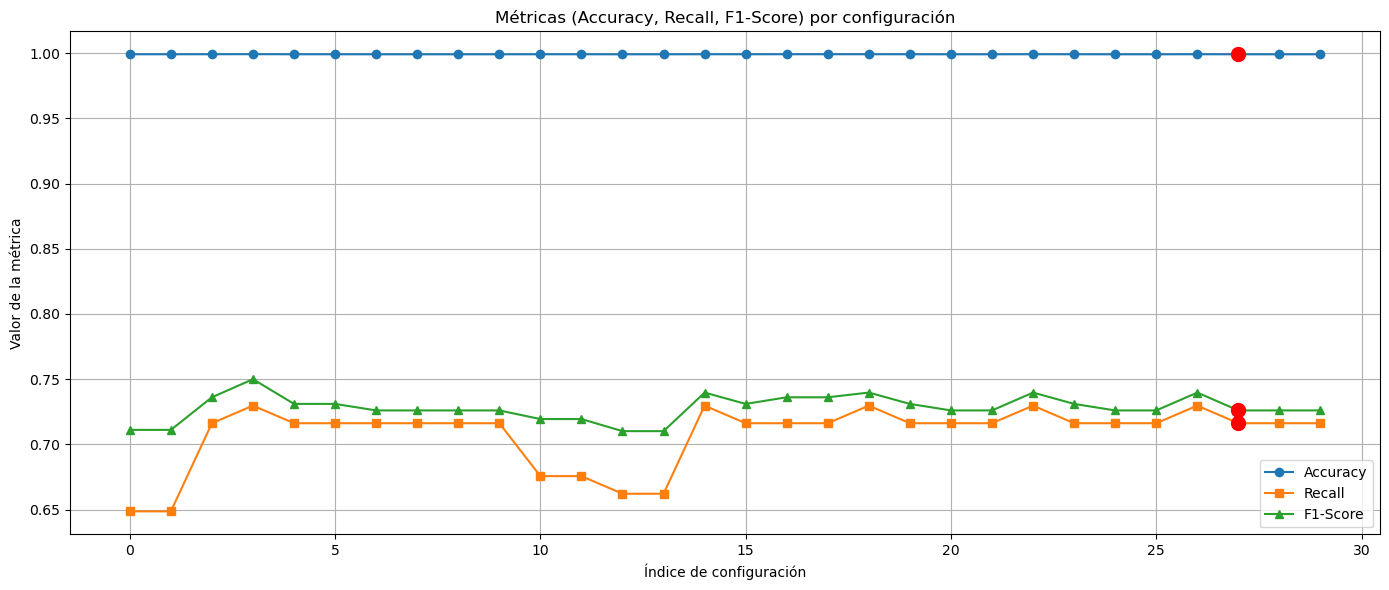

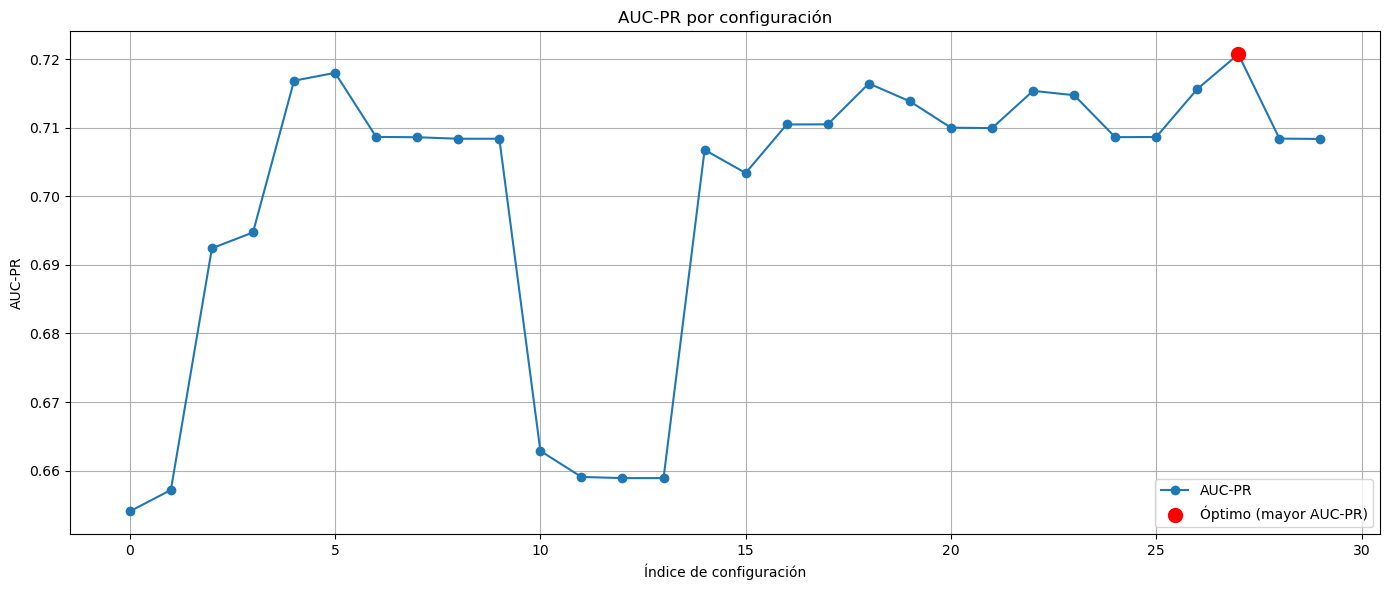

In [22]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    recall_score, 
    f1_score, 
    precision_recall_curve, 
    auc, 
    roc_auc_score,
    make_scorer
)
from sklearn.model_selection import GridSearchCV
import itertools
from tqdm import tqdm
import matplotlib.pyplot as plt
from rich.table import Table
from rich.console import Console

# Se asume que ya tienes definidos df_train, df_val y df_test con la columna "Class"

# Separación de variables predictoras y la variable objetivo
X_train = df_train.drop("Class", axis=1)
y_train = df_train["Class"]

X_val = df_val.drop("Class", axis=1)
y_val = df_val["Class"]

# Definición de la rejilla de hiperparámetros
param_grid = [
    {'penalty': ['l1'], 
     'C': [0.01, 0.1, 1, 10, 100], 
     'solver': ['liblinear', 'saga'],
     'max_iter': [1000]},
    {'penalty': ['l2'], 
     'C': [0.01, 0.1, 1, 10, 100],
     'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
     'max_iter': [1000]}
]

# Inicializamos el clasificador base
logreg = LogisticRegression()

# Función para calcular el AUC-PR
def aucpr_score(y_true, y_score):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    return auc(recall, precision)

# Scorer personalizado basado en AUC-PR (necesita probabilidades)
aucpr_scorer = make_scorer(aucpr_score, needs_proba=True)

# Configuramos y ejecutamos el GridSearchCV (optimización según AUC-PR)
grid_search = GridSearchCV(estimator=logreg, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring=aucpr_scorer, 
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

print("Mejores parámetros (según AUC-PR) encontrados por GridSearchCV:")
print(grid_search.best_params_)

# Obtenemos el modelo con la mejor configuración
mejor_modelo = grid_search.best_estimator_

# Función para evaluar el modelo en un conjunto dado (calcula Accuracy, Recall, F1-Score, AUC-PR y AUC-ROC)
def evaluar_modelo(df, modelo):
    X = df.drop("Class", axis=1)
    y_true = df["Class"]
    
    # Predicciones y probabilidades
    y_pred = modelo.predict(X)
    y_scores = modelo.predict_proba(X)[:, 1]
    
    # Cálculo de métricas
    acc = accuracy_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # AUC de la curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    aucpr = auc(recall, precision)
    
    # AUC de la curva ROC
    aucroc = roc_auc_score(y_true, y_scores)
    
    return acc, rec, f1, aucpr, aucroc

# Evaluamos el modelo en cada conjunto
resultados_train = evaluar_modelo(df_train, mejor_modelo)
resultados_val = evaluar_modelo(df_val, mejor_modelo)
resultados_test = evaluar_modelo(df_test, mejor_modelo)

# Creamos la tabla enriquecida usando rich para mostrar los resultados
console = Console()
tabla = Table(title="Resumen de Métricas por Conjunto")

tabla.add_column("Dataset", justify="center", style="cyan", no_wrap=True)
tabla.add_column("Accuracy", justify="center", style="green")
tabla.add_column("Recall", justify="center", style="green")
tabla.add_column("F1-Score", justify="center", style="green")
tabla.add_column("AUC-PR", justify="center", style="green")
tabla.add_column("AUC-ROC", justify="center", style="green")

tabla.add_row("Train", 
              f"{resultados_train[0]:.6f}", 
              f"{resultados_train[1]:.6f}", 
              f"{resultados_train[2]:.6f}", 
              f"{resultados_train[3]:.6f}", 
              f"{resultados_train[4]:.6f}")

tabla.add_row("Validación", 
              f"{resultados_val[0]:.6f}", 
              f"{resultados_val[1]:.6f}", 
              f"{resultados_val[2]:.6f}", 
              f"{resultados_val[3]:.6f}", 
              f"{resultados_val[4]:.6f}")

tabla.add_row("Test", 
              f"{resultados_test[0]:.6f}", 
              f"{resultados_test[1]:.6f}", 
              f"{resultados_test[2]:.6f}", 
              f"{resultados_test[3]:.6f}", 
              f"{resultados_test[4]:.6f}")

console.print(tabla)

# -------------------------------------------------------------------
# Evaluación manual de todas las combinaciones para graficar las métricas en el conjunto de validación
configs = []
for d in param_grid:
    keys = list(d.keys())
    for values in itertools.product(*(d[k] for k in keys)):
        config = dict(zip(keys, values))
        configs.append(config)

# Listas para almacenar las métricas de cada combinación
accuracy_list = []
recall_list = []
f1_list = []
aucpr_list = []
config_labels = []

# Variables para almacenar la mejor configuración según AUC-PR en el conjunto de validación
best_aucpr = -1
best_config = None
best_index = None

for idx, config in enumerate(tqdm(configs, desc="Evaluando configuraciones")):
    modelo_temp = LogisticRegression(**config)
    modelo_temp.fit(X_train, y_train)
    # Evaluamos en el conjunto de validación
    acc, rec, f1, current_aucpr, _ = evaluar_modelo(df_val, modelo_temp)
    
    accuracy_list.append(acc)
    recall_list.append(rec)
    f1_list.append(f1)
    aucpr_list.append(current_aucpr)
    label = f"pen:{config['penalty']}, C:{config['C']}, sol:{config['solver']}"
    config_labels.append(label)
    
    if current_aucpr > best_aucpr:
        best_aucpr = current_aucpr
        best_config = config
        best_index = idx

print("\nMejor configuración según AUC-PR en el conjunto de validación:")
print(best_config)
print("AUC-PR:", best_aucpr)

# -------------------------------------------------------------------
# Graficamos Accuracy, Recall y F1-Score para cada configuración
plt.figure(figsize=(14, 6))
indices = list(range(len(configs)))
plt.plot(indices, accuracy_list, marker='o', linestyle='-', label='Accuracy')
plt.plot(indices, recall_list, marker='s', linestyle='-', label='Recall')
plt.plot(indices, f1_list, marker='^', linestyle='-', label='F1-Score')

# Marcamos la configuración óptima en rojo
plt.scatter(best_index, accuracy_list[best_index], color='red', s=100, zorder=5)
plt.scatter(best_index, recall_list[best_index], color='red', s=100, zorder=5)
plt.scatter(best_index, f1_list[best_index], color='red', s=100, zorder=5)

plt.title("Métricas (Accuracy, Recall, F1-Score) por configuración")
plt.xlabel("Índice de configuración")
plt.ylabel("Valor de la métrica")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Graficamos el AUC-PR para cada configuración
plt.figure(figsize=(14, 6))
plt.plot(indices, aucpr_list, marker='o', linestyle='-', label='AUC-PR')

# Marcamos la configuración óptima en rojo
plt.scatter(best_index, aucpr_list[best_index], color='red', s=100, zorder=5, label='Óptimo (mayor AUC-PR)')

plt.title("AUC-PR por configuración")
plt.xlabel("Índice de configuración")
plt.ylabel("AUC-PR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## XGBoost

A continuación se presenta una explicación académica que detalla los fundamentos matemáticos subyacentes en la optimización y regularización de modelos de boosting, en particular en implementaciones como XGBoost.

---

### Función Objetivo y Descomposición

En XGBoost, la función objetivo que se busca minimizar se compone de dos términos: la pérdida (o error) del modelo y un término de regularización que penaliza la complejidad del mismo. Matemáticamente se expresa como:

$$
\text{Obj} = \sum_{i=1}^{n} l(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
$$

donde:

- \( l(y_i, \hat{y}_i) \) es la función de pérdida que mide la discrepancia entre el valor real \( y_i \) y la predicción \( \hat{y}_i \).
- \( \Omega(f_k) \) es la función de regularización para el \( k \)-ésimo árbol (o modelo base) y se define para controlar la complejidad del modelo.

---

### Regularización: Términos L1 y L2

Para cada árbol \( f \) con parámetros \( w \) y estructura que consta de \( T \) hojas, la función de regularización se define típicamente como:

$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T} w_j^2 + \alpha \sum_{j=1}^{T} |w_j|
$$

donde:

- **\(\gamma\)**: Es el parámetro que penaliza la complejidad del árbol basado en el número de hojas \( T \). Una mayor \( \gamma \) implica que solo se acepten divisiones que produzcan una reducción sustancial en la pérdida.
- **\(\lambda\)**: Es el coeficiente de la regularización L2, que penaliza el cuadrado de los pesos \( w_j \) de cada hoja, ayudando a mantener estos valores en rangos razonables.
- **\(\alpha\)**: Es el coeficiente de la regularización L1, que penaliza el valor absoluto de los pesos y puede inducir sparsity, es decir, llevar a algunos pesos a cero.

---

### Optimización por Segunda Orden y División de Nodos

Durante el entrenamiento, se utiliza una aproximación de segundo orden (usando la derivada primera y segunda) para actualizar la función objetivo de manera eficiente. Para una función de pérdida diferenciable, se emplea la siguiente expansión en cada iteración:

$$
\mathcal{L}^{(t)} \approx \sum_{i=1}^{n} \left[ g_i f_t(x_i) + \frac{1}{2} h_i f_t(x_i)^2 \right] + \Omega(f_t)
$$

donde:

- \( g_i = \frac{\partial l(y_i, \hat{y}_i^{(t-1)})}{\partial \hat{y}_i^{(t-1)}} \) es el gradiente de la pérdida respecto a la predicción actual.
- \( h_i = \frac{\partial^2 l(y_i, \hat{y}_i^{(t-1)})}{\partial (\hat{y}_i^{(t-1)})^2} \) es la segunda derivada (curvatura) de la pérdida.

Al decidir si se debe realizar una división en un nodo, se calcula la ganancia del split. Sea \( G_L \) y \( H_L \) la suma de gradientes y segundas derivadas del nodo izquierdo, y \( G_R \) y \( H_R \) para el nodo derecho, la ganancia del split es:

$$
\text{Gain} = \frac{1}{2} \left[ \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{(G_L+G_R)^2}{H_L+H_R+\lambda} \right] - \gamma
$$

Aquí, **\(\gamma\)** actúa como un umbral: solo si la ganancia supera este valor se procede a realizar la división. Esto evita que se realicen splits que no aportan mejoras significativas al modelo, ayudando a prevenir el sobreajuste.

---

### Parámetros de Control del Proceso de Boosting

Otros parámetros como **learning_rate (eta)** y **n_estimators** influyen en la forma en que se actualiza el modelo:

- **learning_rate (eta)**: Este factor de escala se aplica a la contribución de cada árbol:

$$
\hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + \eta \, f_t(x_i)
$$

Un valor pequeño de \( \eta \) permite que cada árbol realice ajustes modestos, lo que generalmente mejora la generalización pero requiere un mayor número de iteraciones.

- **n_estimators**: Es el número total de árboles que se construirán en el proceso de boosting. La combinación de un \( \eta \) pequeño con un número elevado de árboles favorece un ajuste más fino y controlado del modelo.

- **booster**: Permite seleccionar el tipo de modelo base a emplear en el boosting. Las opciones más comunes son:
  - *gbtree*: Utiliza árboles de decisión, adecuado para capturar relaciones no lineales.
  - *gblinear*: Emplea modelos lineales, que pueden ser preferibles en problemas de alta dimensionalidad.
  - *dart*: Introduce técnicas de dropout para árboles, lo que puede ayudar a prevenir el sobreajuste.

- **objective**: Especifica la función objetivo a optimizar durante el entrenamiento, la cual debe alinearse con la naturaleza del problema a resolver (por ejemplo, `reg:squarederror` para problemas de regresión o `binary:logistic` para clasificación binaria).

---

### Métodos de Construcción del Árbol y Estrategias de Crecimiento

Los parámetros **tree_method** y **grow_policy** determinan cómo se exploran y dividen los nodos en el árbol:

- **tree_method**: Este parámetro define el algoritmo utilizado para construir el árbol (por ejemplo, métodos exactos, aproximados o basados en histogramas). Dependiendo del método, el cálculo de los gradientes y la búsqueda del mejor split pueden variar en complejidad computacional.

- **grow_policy**: Define la estrategia para la expansión del árbol. Por ejemplo:
  - *Depthwise*: El árbol crece de manera uniforme a lo largo de cada nivel.
  - *Lossguide*: Prioriza divisiones en nodos que prometan una mayor reducción en la pérdida, evaluando las contribuciones de los gradientes en cada nodo.

---

### Conclusión

La integración de estos elementos matemáticos en la función objetivo y en la toma de decisiones durante la construcción de los árboles permite a XGBoost y otros algoritmos de boosting alcanzar un balance entre la precisión en el entrenamiento y la capacidad de generalización a datos no vistos. Los parámetros de complejidad, regularización y velocidad de entrenamiento se ajustan conjuntamente para optimizar el rendimiento del modelo, reduciendo el riesgo de sobreajuste y promoviendo un aprendizaje robusto y eficiente.


[I 2025-04-04 14:57:23,805] Using an existing study with name 'xgboost_opt' instead of creating a new one.
[I 2025-04-04 14:57:58,641] Trial 126 finished with value: 0.8524738095240197 and parameters: {'max_depth': 6, 'learning_rate': 0.07374694401698492, 'gamma': 0.4162575834930934, 'min_child_weight': 2, 'reg_alpha': 0.0019469603527914683, 'reg_lambda': 0.8196754399604708, 'subsample': 0.6304447516412478, 'colsample_bytree': 0.712824119467064}. Best is trial 125 with value: 0.8551130322268392.
[I 2025-04-04 14:58:21,152] Trial 127 finished with value: 0.848870830748139 and parameters: {'max_depth': 6, 'learning_rate': 0.07288111210089337, 'gamma': 0.38003946965807545, 'min_child_weight': 2, 'reg_alpha': 0.002044055828036384, 'reg_lambda': 0.8076914135090195, 'subsample': 0.6324827523562677, 'colsample_bytree': 0.7298486559545012}. Best is trial 125 with value: 0.8551130322268392.


Número de ensayos realizados: 128
Mejor AUCPR: 0.8551130322268392
Mejores hiperparámetros: {'max_depth': 6, 'learning_rate': 0.07518406254253178, 'gamma': 0.4209337689396252, 'min_child_weight': 2, 'reg_alpha': 0.0019344951936563519, 'reg_lambda': 0.8294180451950457, 'subsample': 0.6148342500783923, 'colsample_bytree': 0.7123498661133882}


c:\Users\spinz\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:58:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train Metrics:
  Accuracy: 0.9997
  F1-Score: 0.9231
  Recall  : 0.8721
  AUCPR   : 0.8552
  AUCROC  : 0.9999

Validation Metrics:
  Accuracy: 0.9995
  F1-Score: 0.8421
  Recall  : 0.7568
  AUCPR   : 0.7187
  AUCROC  : 0.9859

Test Metrics:
  Accuracy: 0.9995
  F1-Score: 0.8382
  Recall  : 0.7703
  AUCPR   : 0.7085
  AUCROC  : 0.9688



              Resultados de la Mejor Optimización              
┏━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃ Dataset    ┃ Accuracy ┃ F1-Score ┃ Recall ┃ AUCPR  ┃ AUCROC ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│ Train      │ 0.9997   │ 0.9231   │ 0.8721 │ 0.8552 │ 0.9999 │
│ Validation │ 0.9995   │ 0.8421   │ 0.7568 │ 0.7187 │ 0.9859 │
│ Test       │ 0.9995   │ 0.8382   │ 0.7703 │ 0.7085 │ 0.9688 │
└────────────┴──────────┴──────────┴────────┴────────┴────────┘

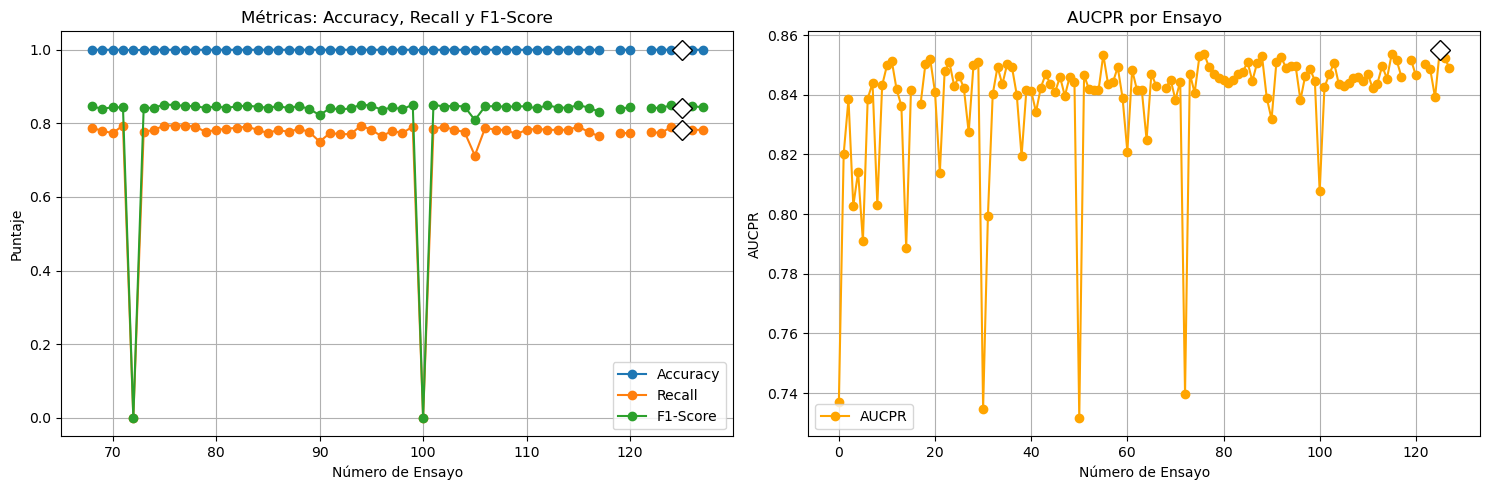

In [24]:
import optuna
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, average_precision_score, roc_auc_score
import matplotlib.pyplot as plt
from rich.table import Table
from rich.console import Console

# --- Configurar la URL de conexión a SQLite (sin usuario ni contraseña) ---
storage_url = "sqlite:///optuna_study.db"

# --- Función objetivo con pruner para early stopping ---
def objective(trial):
    params = {
        "max_depth": trial.suggest_int("max_depth", 3, 9),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.2, log=True),
        "gamma": trial.suggest_float("gamma", 0.0, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 7),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-3, 1.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10.0, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "n_estimators": 100,
        "objective": "binary:logistic",
        "seed": 42,
        "use_label_encoder": False,
        "eval_metric": "aucpr",
        "tree_method": "hist"  # Aprovecha la GPU si está disponible
    }
    
    model = xgb.XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    
    # Métrica de AUCPR (objetivo de optimización)
    aucpr_scores = cross_val_score(
        model,
        df_train.drop("Class", axis=1),
        df_train["Class"],
        scoring="average_precision",
        cv=cv,
        n_jobs=-1
    )
    aucpr_mean = aucpr_scores.mean()
    
    # Evaluar métricas adicionales
    acc_scores = cross_val_score(
        model,
        df_train.drop("Class", axis=1),
        df_train["Class"],
        scoring="accuracy",
        cv=cv,
        n_jobs=-1
    )
    acc_mean = acc_scores.mean()
    
    f1_scores = cross_val_score(
        model,
        df_train.drop("Class", axis=1),
        df_train["Class"],
        scoring="f1",
        cv=cv,
        n_jobs=-1
    )
    f1_mean = f1_scores.mean()
    
    rec_scores = cross_val_score(
        model,
        df_train.drop("Class", axis=1),
        df_train["Class"],
        scoring="recall",
        cv=cv,
        n_jobs=-1
    )
    rec_mean = rec_scores.mean()
    
    # Guardar las métricas en los atributos del trial
    trial.set_user_attr("accuracy", acc_mean)
    trial.set_user_attr("f1", f1_mean)
    trial.set_user_attr("recall", rec_mean)
    
    return aucpr_mean

# --- Crear estudio utilizando almacenamiento en SQLite ---
pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
study = optuna.create_study(
    study_name="xgboost_opt",
    direction="maximize",
    storage=storage_url,
    load_if_exists=True,
    pruner=pruner
)

n_trials = 2  # Número máximo de ensayos
study.optimize(objective, n_trials=n_trials)

print("Número de ensayos realizados:", len(study.trials))
print("Mejor AUCPR:", study.best_trial.value)
print("Mejores hiperparámetros:", study.best_trial.params)

# --- Entrenar el mejor modelo con el conjunto de entrenamiento completo ---
best_params = study.best_trial.params
best_params.update({
    "n_estimators": 100,
    "objective": "binary:logistic",
    "seed": 42,
    "use_label_encoder": False,
    "eval_metric": "aucpr",
    "tree_method": "hist"
})
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(
    df_train.drop("Class", axis=1),
    df_train["Class"],
    eval_set=[(df_val.drop("Class", axis=1), df_val["Class"])],
    verbose=False
)

# --- Evaluar el modelo óptimo en los conjuntos Train, Validation y Test ---
pred_train = best_model.predict(df_train.drop("Class", axis=1))
pred_val = best_model.predict(df_val.drop("Class", axis=1))
pred_test = best_model.predict(df_test.drop("Class", axis=1))

metrics = {}
for dataset, (X, y, preds) in zip(
    ['Train', 'Validation', 'Test'],
    [
        (df_train.drop("Class", axis=1), df_train["Class"], pred_train),
        (df_val.drop("Class", axis=1), df_val["Class"], pred_val),
        (df_test.drop("Class", axis=1), df_test["Class"], pred_test)
    ]
):
    acc = accuracy_score(y, preds)
    f1 = f1_score(y, preds)
    rec = recall_score(y, preds)
    aucpr = average_precision_score(y, preds)
    # Calcular AUC ROC utilizando las probabilidades del modelo
    aucroc = roc_auc_score(y, best_model.predict_proba(X)[:, 1])
    metrics[dataset] = {
        'Accuracy': acc, 
        'F1-Score': f1, 
        'Recall': rec, 
        'AUCPR': aucpr,
        'AUCROC': aucroc
    }

for ds in ['Train', 'Validation', 'Test']:
    print(f"{ds} Metrics:")
    print(f"  Accuracy: {metrics[ds]['Accuracy']:.4f}")
    print(f"  F1-Score: {metrics[ds]['F1-Score']:.4f}")
    print(f"  Recall  : {metrics[ds]['Recall']:.4f}")
    print(f"  AUCPR   : {metrics[ds]['AUCPR']:.4f}")
    print(f"  AUCROC  : {metrics[ds]['AUCROC']:.4f}\n")

# --- Mostrar resultados en una tabla con Rich ---
table = Table(title="Resultados de la Mejor Optimización")

table.add_column("Dataset", style="cyan", no_wrap=True)
table.add_column("Accuracy", style="magenta")
table.add_column("F1-Score", style="green")
table.add_column("Recall", style="yellow")
table.add_column("AUCPR", style="red")
table.add_column("AUCROC", style="blue")  # Nueva columna para AUC ROC

# Agregar filas a la tabla
for ds in ['Train', 'Validation', 'Test']:
    table.add_row(
        ds,
        f"{metrics[ds]['Accuracy']:.4f}",
        f"{metrics[ds]['F1-Score']:.4f}",
        f"{metrics[ds]['Recall']:.4f}",
        f"{metrics[ds]['AUCPR']:.4f}",
        f"{metrics[ds]['AUCROC']:.4f}"
    )

console = Console()
console.print(table)

# --- Extraer métricas de cada ensayo realizado por Optuna ---
trial_numbers = []
aucpr_trials = []
accuracy_trials = []
f1_trials = []
recall_trials = []

for trial in study.trials:
    trial_numbers.append(trial.number)
    aucpr_trials.append(trial.value)
    accuracy_trials.append(trial.user_attrs.get("accuracy"))
    f1_trials.append(trial.user_attrs.get("f1"))
    recall_trials.append(trial.user_attrs.get("recall"))

# --- Visualización: Dos gráficos de líneas lado a lado ---
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Accuracy, Recall y F1-Score
axs[0].plot(trial_numbers, accuracy_trials, label="Accuracy", marker='o')
axs[0].plot(trial_numbers, recall_trials, label="Recall", marker='o')
axs[0].plot(trial_numbers, f1_trials, label="F1-Score", marker='o')
axs[0].set_title("Métricas: Accuracy, Recall y F1-Score")
axs[0].set_xlabel("Número de Ensayo")
axs[0].set_ylabel("Puntaje")
axs[0].legend()
axs[0].grid(True)

# Gráfico 2: AUCPR por ensayo
axs[1].plot(trial_numbers, aucpr_trials, label="AUCPR", color="orange", marker='o')
axs[1].set_title("AUCPR por Ensayo")
axs[1].set_xlabel("Número de Ensayo")
axs[1].set_ylabel("AUCPR")
axs[1].legend()
axs[1].grid(True)

# --- Marcar la configuración con mayor AUCPR en ambos gráficos ---
aucpr_trials_clean = [score if score is not None else -np.inf for score in aucpr_trials]
best_idx = np.argmax(aucpr_trials_clean)
best_trial = trial_numbers[best_idx]

# Marcar en el gráfico de Accuracy, Recall y F1-Score
axs[0].plot(best_trial, accuracy_trials[best_idx],
            marker="D", markersize=10, markerfacecolor="white", markeredgecolor="black")
axs[0].plot(best_trial, recall_trials[best_idx],
            marker="D", markersize=10, markerfacecolor="white", markeredgecolor="black")
axs[0].plot(best_trial, f1_trials[best_idx],
            marker="D", markersize=10, markerfacecolor="white", markeredgecolor="black")

# Marcar en el gráfico de AUCPR
axs[1].plot(best_trial, aucpr_trials[best_idx],
            marker="D", markersize=10, markerfacecolor="white", markeredgecolor="black")

plt.tight_layout()
plt.show()


A partir de las respuestas de los modelos anteriores podemos decir que el promedio de diferencia entre los diferente:

        Mejor Optimización - Evaluación del Modelo KNN         
┏━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃ Dataset    ┃ Accuracy ┃ F1-Score ┃ Recall ┃ AUCPR  ┃ AUCROC ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│ Train      │  0.9995  │  0.8477  │ 0.7849 │ 0.9154 │ 0.9999 │
│ Validation │  0.9993  │  0.7647  │ 0.7027 │ 0.7125 │ 0.9051 │
│ Test       │  0.9995  │  0.8296  │ 0.7568 │ 0.8024 │ 0.9187 │
└────────────┴──────────┴──────────┴────────┴────────┴────────┘

         Resumen de Métricas por Conjunto- Regresion logistica                   
┏━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃  Dataset   ┃ Accuracy ┃  Recall  ┃ F1-Score ┃  AUC-PR  ┃ AUC-ROC  ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│   Train    │ 0.999448 │ 0.796512 │ 0.832827 │ 0.834982 │ 0.988315 │
│ Validación │ 0.999087 │ 0.716216 │ 0.731034 │ 0.716870 │ 0.978029 │
│    Test    │ 0.999438 │ 0.756757 │ 0.823529 │ 0.804352 │ 0.951891 │
└────────────┴──────────┴──────────┴──────────┴──────────┴──────────┘

         Resultados de la Mejor Optimización XGBoost              
┏━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃ Dataset    ┃ Accuracy ┃ F1-Score ┃ Recall ┃ AUCPR  ┃ AUCROC ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│ Train      │ 0.9997   │ 0.9231   │ 0.8721 │ 0.8552 │ 0.9999 │
│ Validation │ 0.9995   │ 0.8421   │ 0.7568 │ 0.7187 │ 0.9859 │
│ Test       │ 0.9995   │ 0.8382   │ 0.7703 │ 0.7085 │ 0.9688 │
└────────────┴──────────┴──────────┴────────┴────────┴────────┘